# Load Dataset:
1. Features.csv: contains all the features for each census tract
2. Feature_Names.csv: contains the name of each feature for each census tract
3. Target: contains the target values for each census tract
    - Number of crime occurence for Level 1,2,3 in each year

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
Features = pd.read_csv("Features.csv")
Features = Features.convert_objects(convert_numeric=True)
Features = Features.fillna(0)
Features.head()

E:\Applications\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (117,120,123,126,170) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\Applications\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,Year,Census Tract,1,2,3,4,5,6,7,8,...,427,428,429,430,431,432,433,434,435,436
0,2011,101.00,2518,67.0,2518,67.0,0,0.0,1239,33.0,...,0.0,463,8.9,0,0.0,145,2.8,2409.639812,1.968697,2642.865013
1,2011,102.01,3631,68.7,3631,68.7,0,0.0,1657,31.3,...,0.0,684,10.1,0,0.0,703,10.4,1944.032556,0.831240,8144.461250
2,2011,102.02,1323,57.3,1323,57.3,0,0.0,986,42.7,...,1.1,50,1.8,9,0.3,259,9.6,1828.549034,1.143278,2368.628637
3,2011,103.00,3478,66.2,3478,66.2,0,0.0,1777,33.8,...,0.7,546,8.7,0,0.0,545,8.7,1866.296510,0.625417,10044.504630
4,2011,104.00,2832,65.4,2832,65.4,0,0.0,1500,34.6,...,0.5,510,10.8,0,0.0,63,1.3,1381.220732,0.516471,9171.857836


In [4]:
Feature_Names = pd.read_csv("Feature_Names.csv")
Feature_Names.head()

,Number,Feature_Name
0,1,Estimate; EMPLOYMENT STATUS 0 In labor force
1,2,Percent; EMPLOYMENT STATUS 0 In labor force
2,3,Estimate; EMPLOYMENT STATUS 0 In labor force 0...
3,4,Percent; EMPLOYMENT STATUS 0 In labor force 0 ...
4,5,Estimate; EMPLOYMENT STATUS 0 In labor force 0...


In [5]:
Targets = pd.read_csv("Targets.csv")
Targets.head()

,Year,Census Tract,Next_Year_Lvl_1,Next_Year_Lvl_2,Next_Year_Lvl_3
0,2011,101.00,38,298,408
1,2011,102.01,40,212,322
2,2011,102.02,22,216,430
3,2011,103.00,33,164,257
4,2011,104.00,20,112,162


# EDA 1: Time Series Trend Analysis
We want to find the overall crime occurences trend between 2012 to 2017
- We use line chart to plot the total crime occurences by level by year

In [6]:
Occurence_1 = Targets.groupby(["Year"])["Next_Year_Lvl_1"].sum()
Occurence_2 = Targets.groupby(["Year"])["Next_Year_Lvl_2"].sum()
Occurence_3 = Targets.groupby(["Year"])["Next_Year_Lvl_3"].sum()

Text(0.5, 0, 'Level 3')

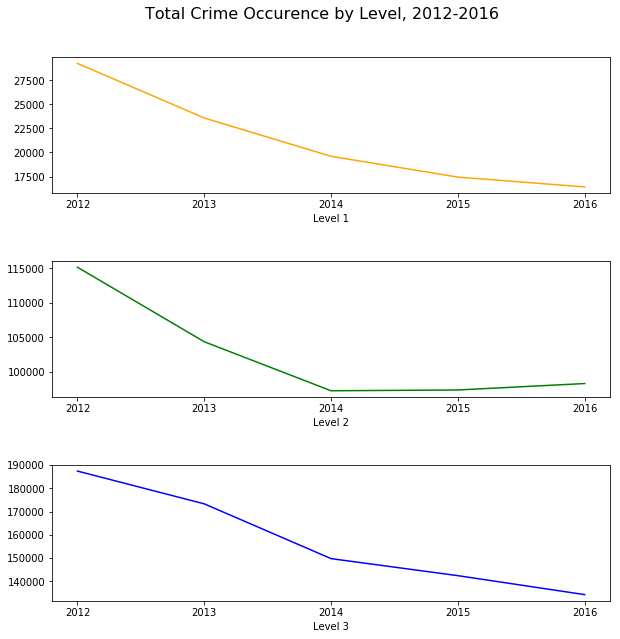

In [7]:
Year = ['2012','2013','2014','2015','2016']
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,10))
fig.subplots_adjust(hspace=.5,wspace=0.0001)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#fig, axarr = plt.subplots(1,1)
plt.suptitle("Total Crime Occurence by Level, 2012-2016", fontsize=16, x = 0.5, y = 0.95)

plt.subplot(3,1,1)
plt.plot(Year,Occurence_1,color = 'orange')
plt.xlabel("Level 1")

plt.subplot(3,1,2)
plt.plot(Year,Occurence_2,color = 'g')
plt.xlabel("Level 2")

plt.subplot(3,1,3)
plt.plot(Year,Occurence_3,color = 'b')
plt.xlabel("Level 3")


Text(0.5, 1.0, 'Overall Crime Occurences by Year')

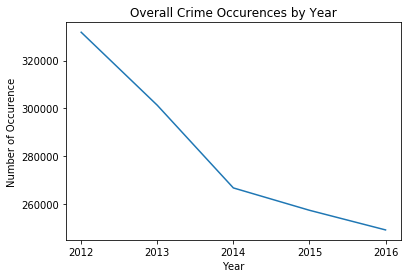

In [8]:
#Total Crime
Occurence_total = np.array(Occurence_1) + np.array(Occurence_2) + np.array(Occurence_3)
plt.plot(Year,Occurence_total)

plt.xlabel("Year")
plt.ylabel("Number of Occurence")
plt.title("Overall Crime Occurences by Year")

Text(0.5, 1.0, 'Mean Family Income by Year')

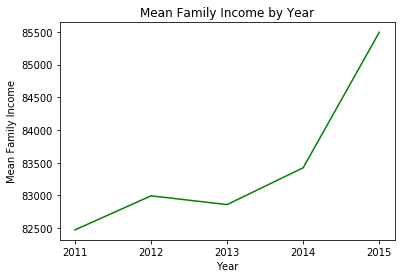

In [9]:
#Average out the mean family income for all the census tracts by year
Year_2 = ["2011","2012","2013","2014","2015"]
avg_income = Features.groupby(["Year"])["151"].mean()

plt.plot(Year_2,avg_income,color = "g")

plt.xlabel("Year")
plt.ylabel("Mean Family Income")
plt.title("Mean Family Income by Year")

Text(0.5, 1.0, 'Total Population by Year')

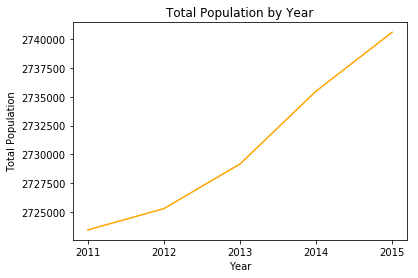

In [10]:
total_population = Features.groupby(["Year"])["262"].sum()
plt.plot(Year_2,total_population,color = "orange")

plt.xlabel("Year")
plt.ylabel("Total Population")
plt.title("Total Population by Year")

Text(0.5, 1.0, 'Average Population Density')

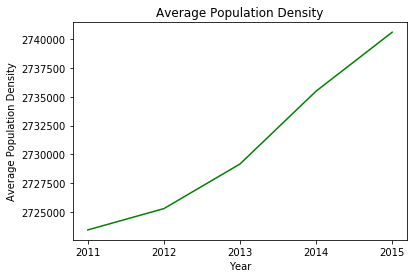

In [11]:
# Average Population Density by Year
population_density = Features.groupby(["Year"])["436"].sum()
plt.plot(Year_2,total_population,color = "g")

plt.xlabel("Year")
plt.ylabel("Average Population Density")
plt.title("Average Population Density")

# EDA2: Census-tract-level Data Analysis
    In this section, we would like to find the correlation between each features and the target. We want to find out the most correlated features, and visualize their correlations.
    
    - First, we generate mutual information of the predictors with respect to three different targets (i.e. level 1-3 crimes). We use sklearn.feature_selection.mutual_info_regression because the target variable is continuous. 

In [12]:
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression

In [13]:
X = Features.iloc[:,2:]
y_1 = Targets.iloc[:,2]
y_2 = Targets.iloc[:,3]
y_3 = Targets.iloc[:,4]

In [14]:
#Scale the X matrix
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_scaled)


# Level 1 Mutual Information

In [15]:
#When doing mutual information, we set the default nearest neighbor to 3 
#Mutual Information of X & y_1
Mutual_Info_Lvl_1 = mutual_info_regression(X_normalized,y_1)

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [16]:
Lvl_1 = pd.DataFrame(Mutual_Info_Lvl_1,index = X.columns, columns = ["IG"])
Lvl_1["Feature_Name"] = np.array(Feature_Names["Feature_Name"])

In [17]:
#Rank the features based on information gain
rank_Lvl_1 = Lvl_1.sort_values(['IG'],ascending = 0)
#Select the top 200 features and print out the header
rank_Lvl_1_selected = rank_Lvl_1[0:200]
rank_Lvl_1_selected.head()

,IG,Feature_Name
126,0.183079,Estimate; INCOME AND BENEFITS 0 With Food Sta...
192,0.173202,Estimate; RELATIONSHIP 0 Other relatives
236,0.166195,Estimate; EDUCATIONAL ATTAINMENT 0 9th to 12th...
429,0.155974,Percent; RACE 0 Asian
190,0.143998,Estimate; RELATIONSHIP 0 Child


Text(0.5, 1.0, 'Top 10 Features for Level-1 Crime ')

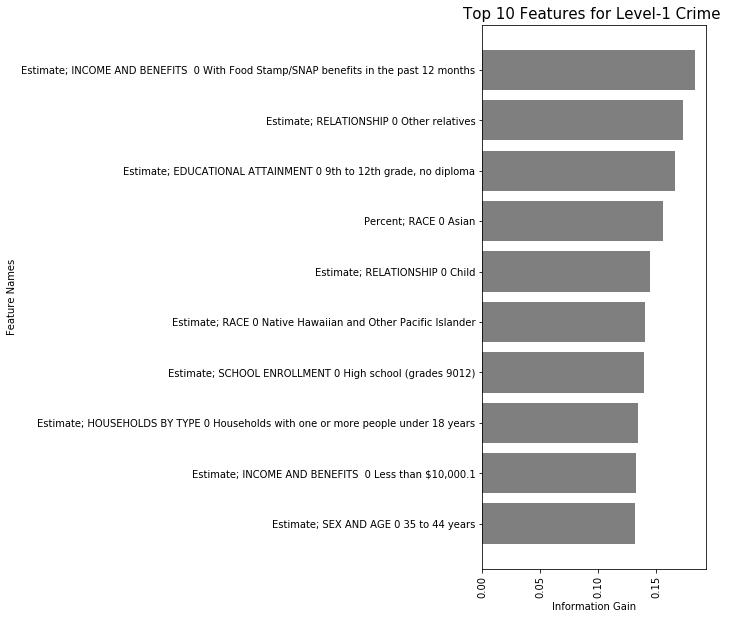

In [18]:
#For better visualization, we want to plot the top 10 features along with their information gains

plt.figure(figsize=(4,10))
top_50 = rank_Lvl_1_selected[0:10].sort_values(['IG'],ascending = 1)
top_50
IG = list(top_50["IG"])
Names = list(top_50["Feature_Name"])
plt.barh(Names, IG, color = 'tab:gray')
plt.xticks(rotation = 90)
plt.xlabel('Information Gain', fontsize=10)
plt.ylabel('Feature Names', fontsize=10)
plt.title('Top 10 Features for Level-1 Crime ',fontsize=15)


# Level 2 Mutual Information

In [19]:
#When doing mutual information, we set the default nearest neighbor to 3 
#Mutual Information of X & y_1
Mutual_Info_Lvl_2 = mutual_info_regression(X_normalized,y_2)

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [20]:
Lvl_2 = pd.DataFrame(Mutual_Info_Lvl_2,index = X.columns, columns = ["IG"])
Lvl_2["Feature_Name"] = np.array(Feature_Names["Feature_Name"])

rank_Lvl_2 = Lvl_2.sort_values(['IG'],ascending = 0)

rank_Lvl_2_selected = rank_Lvl_2[0:200]
rank_Lvl_2_selected.head()

,IG,Feature_Name
126,0.412494,Estimate; INCOME AND BENEFITS 0 With Food Sta...
120,0.278145,Estimate; INCOME AND BENEFITS 0 With Suppleme...
130,0.270413,Estimate; INCOME AND BENEFITS 0 Less than $10...
127,0.251782,Percent; INCOME AND BENEFITS 0 With Food Stam...
236,0.250115,Estimate; EDUCATIONAL ATTAINMENT 0 9th to 12th...


Text(0.5, 1.0, 'Top 10 Features for Level-2 Crime ')

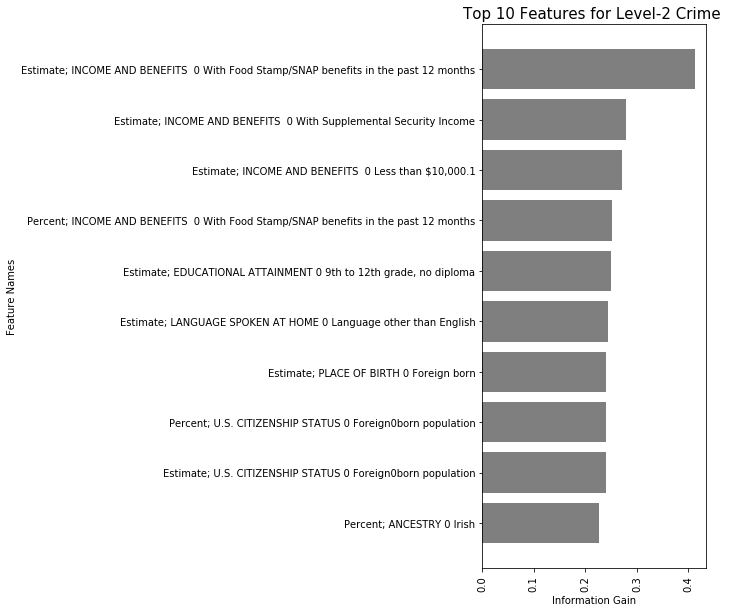

In [21]:
#For better visualization, we want to plot the top 10 features along with their information gains

plt.figure(figsize=(4,10))
top_50 = rank_Lvl_2_selected[0:10].sort_values(['IG'],ascending = 1)
IG = list(top_50["IG"])
Names = list(top_50["Feature_Name"])
plt.barh(Names, IG, color = 'tab:gray')
plt.xticks(rotation = 90)
plt.xlabel('Information Gain', fontsize=10)
plt.ylabel('Feature Names', fontsize=10)
plt.title('Top 10 Features for Level-2 Crime ',fontsize=15)

# Level 3 Mutual Information

In [22]:
#When doing mutual information, we set the default nearest neighbor to 3 
#Mutual Information of X & y_1
Mutual_Info_Lvl_3 = mutual_info_regression(X_normalized,y_3)

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [23]:
Lvl_3 = pd.DataFrame(Mutual_Info_Lvl_3,index = X.columns, columns = ["IG"])
Lvl_3["Feature_Name"] = np.array(Feature_Names["Feature_Name"])

rank_Lvl_3 = Lvl_3.sort_values(['IG'],ascending = 0)

rank_Lvl_3_selected = rank_Lvl_3[0:200]
rank_Lvl_3_selected.head()

,IG,Feature_Name
126,0.276510,Estimate; INCOME AND BENEFITS 0 With Food Sta...
120,0.208070,Estimate; INCOME AND BENEFITS 0 With Suppleme...
434,0.208057,Distance to the nearest Police Station
430,0.190645,Estimate; RACE 0 Native Hawaiian and Other Pac...
189,0.183271,Percent; RELATIONSHIP 0 Spouse


Text(0.5, 1.0, 'Top 10 Features for Level-3 Crime ')

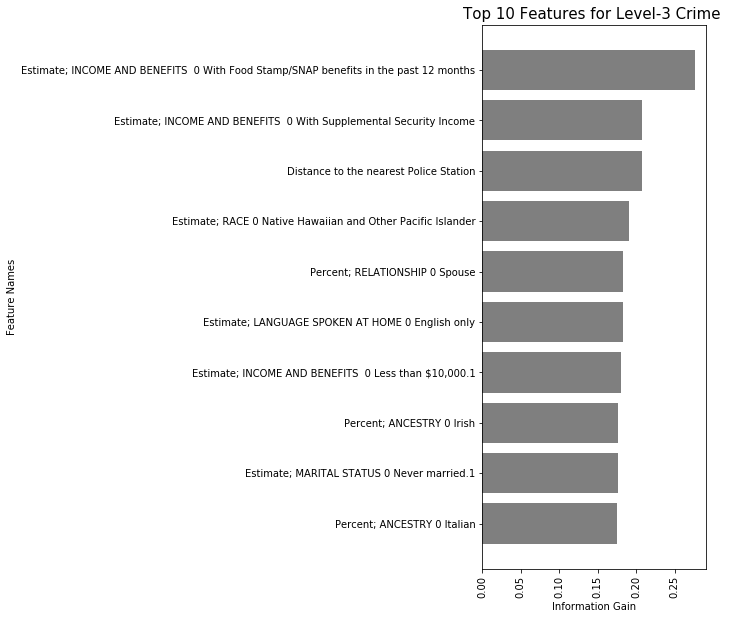

In [24]:
# For better visualization, we want to plot the top 10 features along with their information gains

plt.figure(figsize=(4,10))
top_50 = rank_Lvl_3_selected[0:10].sort_values(['IG'],ascending = 1)
IG = list(top_50["IG"])
Names = list(top_50["Feature_Name"])
plt.barh(Names, IG, color = 'tab:gray')
plt.xticks(rotation = 90)
plt.xlabel('Information Gain', fontsize=10)
plt.ylabel('Feature Names', fontsize=10)
plt.title('Top 10 Features for Level-3 Crime ',fontsize=15)

Insights:
    - Feature 126: Number of families with Food Stamp/SNAP benefits in the past 12 months ranked the highest for all three levels of crime. Maybe it is beneficial to search for other features that are related to food insecurity. For example, number of food banks/shelters within the census tract.
    - Number of families with income less than $10,000 are in top 10 features for all three levels of crime, which validates our previous assumption that income would be an important factor to predict crime.
    - Initially, we assumed that the distance to the nearest police station would be related to the crime rate. Based on our assumption, we collected the information regarding police stations in Chicago, and calculated the distance using ArcGIS. As we can see from the graph, this factor ranked the second for level-3 crime, which validates our assumption. Please be noted that level-3 crime is catrgorized as the most serious crime. If level-3 crime rate is high in a certain area, more police force is required to prevent the potential harm to the citizens. 

## Visualization of top features from MI

In [25]:
rank_Lvl_1_selected.head(10)

,IG,Feature_Name
126,0.183079,Estimate; INCOME AND BENEFITS 0 With Food Sta...
192,0.173202,Estimate; RELATIONSHIP 0 Other relatives
236,0.166195,Estimate; EDUCATIONAL ATTAINMENT 0 9th to 12th...
429,0.155974,Percent; RACE 0 Asian
190,0.143998,Estimate; RELATIONSHIP 0 Child
430,0.140284,Estimate; RACE 0 Native Hawaiian and Other Pac...
228,0.139116,Estimate; SCHOOL ENROLLMENT 0 High school (gra...
178,0.134204,Estimate; HOUSEHOLDS BY TYPE 0 Households with...
130,0.132038,Estimate; INCOME AND BENEFITS 0 Less than $10...
359,0.131739,Estimate; SEX AND AGE 0 35 to 44 years


In [26]:
rank_Lvl_2_selected.head(10)

,IG,Feature_Name
126,0.412494,Estimate; INCOME AND BENEFITS 0 With Food Sta...
120,0.278145,Estimate; INCOME AND BENEFITS 0 With Suppleme...
130,0.270413,Estimate; INCOME AND BENEFITS 0 Less than $10...
127,0.251782,Percent; INCOME AND BENEFITS 0 With Food Stam...
236,0.250115,Estimate; EDUCATIONAL ATTAINMENT 0 9th to 12th...
287,0.244737,Estimate; LANGUAGE SPOKEN AT HOME 0 Language o...
265,0.240233,Estimate; PLACE OF BIRTH 0 Foreign born
268,0.240105,Percent; U.S. CITIZENSHIP STATUS 0 Foreign0bor...
267,0.239836,Estimate; U.S. CITIZENSHIP STATUS 0 Foreign0bo...
312,0.227298,Percent; ANCESTRY 0 Irish


In [27]:
rank_Lvl_3_selected.head(10)

,IG,Feature_Name
126,0.276510,Estimate; INCOME AND BENEFITS 0 With Food Sta...
120,0.208070,Estimate; INCOME AND BENEFITS 0 With Suppleme...
434,0.208057,Distance to the nearest Police Station
430,0.190645,Estimate; RACE 0 Native Hawaiian and Other Pac...
189,0.183271,Percent; RELATIONSHIP 0 Spouse
285,0.183236,Estimate; LANGUAGE SPOKEN AT HOME 0 English only
130,0.180172,Estimate; INCOME AND BENEFITS 0 Less than $10...
312,0.177134,Percent; ANCESTRY 0 Irish
210,0.176173,Estimate; MARITAL STATUS 0 Never married.1
314,0.175428,Percent; ANCESTRY 0 Italian


In [28]:
# level 1-3 plot prepare
feature_126 = Features["126"].tolist()
feature_192 = Features["192"].tolist()
feature_120 = Features["120"].tolist()
feature_434 = Features["434"].tolist()
target_1 = Targets["Next_Year_Lvl_1"].tolist()
target_2 = Targets["Next_Year_Lvl_2"].tolist()
target_3 = Targets["Next_Year_Lvl_3"].tolist()

In [43]:
from scipy.stats.kde import gaussian_kde
import seaborn as sns

def heatmap(x,y,x_label):
    x= np.array(x)
    y=np.array(y)
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)

    fig = plt.figure(figsize=(6,8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
    ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())

    ax1.set_xlabel(x_label)
    ax1.set_ylabel('# of level 3 crime')

    ax2.set_xlabel(x_label)
    ax2.set_ylabel('# of level 3 crime')

Text(0.5, 1.0, '192 - Relationship Other Relatives VS # of lvl 1 crime')

<Figure size 1440x1152 with 0 Axes>

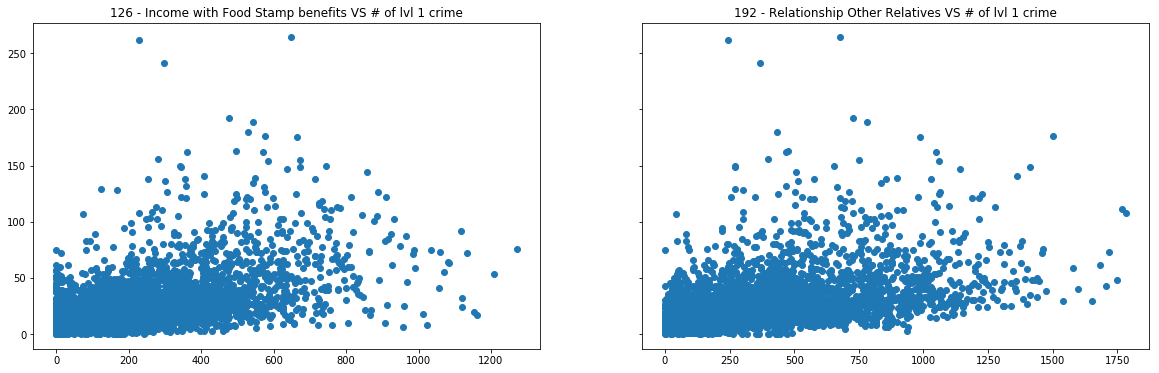

In [34]:
fig = plt.figure(figsize=(20, 16)) 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20, 6))

ax1.plot(feature_126, target_1, "o")
ax1.set_title('126 - Income with Food Stamp benefits VS # of lvl 1 crime')

ax2.plot(feature_192, target_1, "o")
ax2.set_title('192 - Relationship Other Relatives VS # of lvl 1 crime')

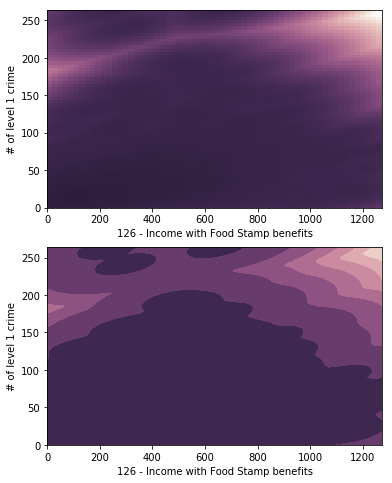

In [37]:
heatmap(feature_126, target_1, "126 - Income with Food Stamp benefits")

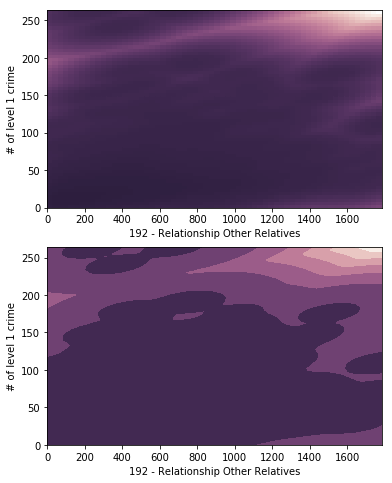

In [39]:
heatmap(feature_192, target_1, "192 - Relationship Other Relatives")

Text(0.5,1,'120 - Income with Supplemental Security Income VS # of lvl 2 crime')

<Figure size 1440x1152 with 0 Axes>

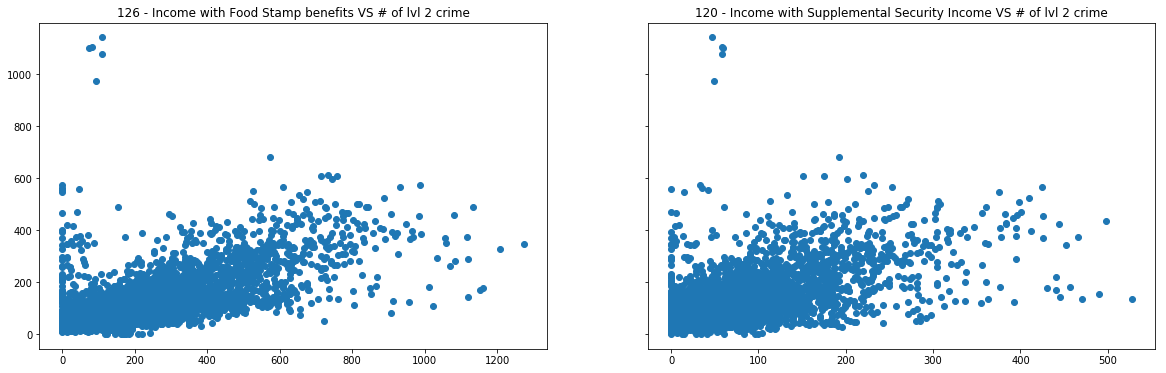

In [39]:
fig = plt.figure(figsize=(20, 16)) 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20, 6))

ax1.plot(feature_126, target_2, "o")
ax1.set_title('126 - Income with Food Stamp benefits VS # of lvl 2 crime')

ax2.plot(feature_120, target_2, "o")
ax2.set_title('120 - Income with Supplemental Security Income VS # of lvl 2 crime')

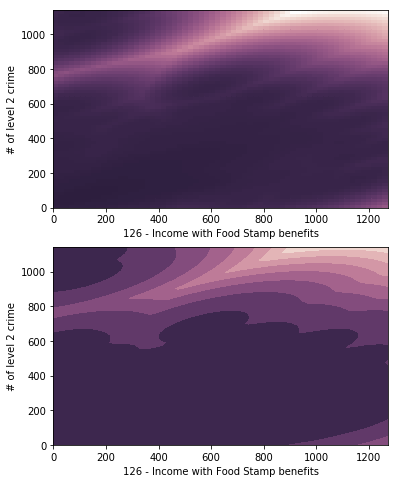

In [41]:
heatmap(feature_126, target_2, "126 - Income with Food Stamp benefits")

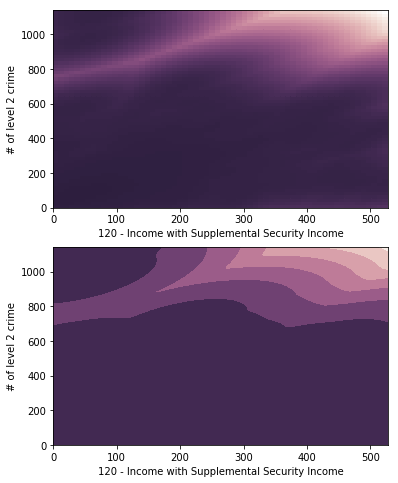

In [42]:
heatmap(feature_120, target_2, "120 - Income with Supplemental Security Income")

Text(0.5,1,'434 - Distance to the nearest Police Station # of lvl 3 crime')

<Figure size 1440x1152 with 0 Axes>

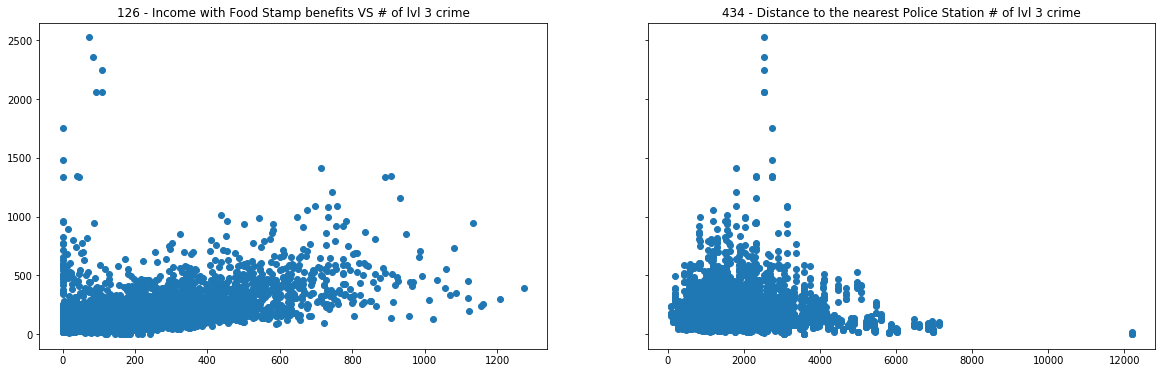

In [40]:
fig = plt.figure(figsize=(20, 16)) 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20, 6))

ax1.plot(feature_126, target_3, "o")
ax1.set_title('126 - Income with Food Stamp benefits VS # of lvl 3 crime')

ax2.plot(feature_434, target_3, "o")
ax2.set_title('434 - Distance to the nearest Police Station # of lvl 3 crime')

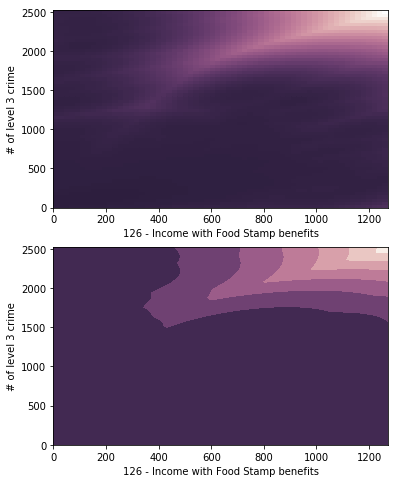

In [44]:
heatmap(feature_126, target_3, "126 - Income with Food Stamp benefits")

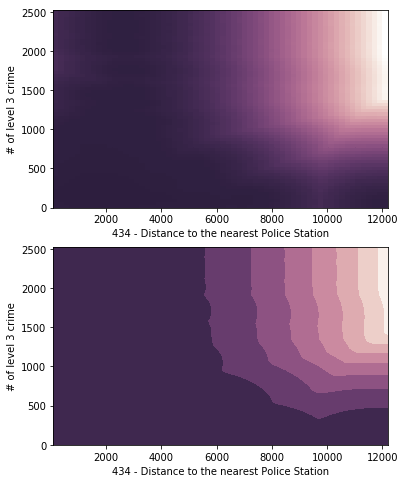

In [46]:
heatmap(feature_434, target_3, "434 - Distance to the nearest Police Station")

## Correlation between topk(10) features for each level of crime

In [33]:
# level 1 plot prepare
level1_df = X_normalized[[126,192,236,429,190,228,430,402,359,130]]
level1_df ["target"] = Targets["Next_Year_Lvl_1"]

c:\users\suting yang\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


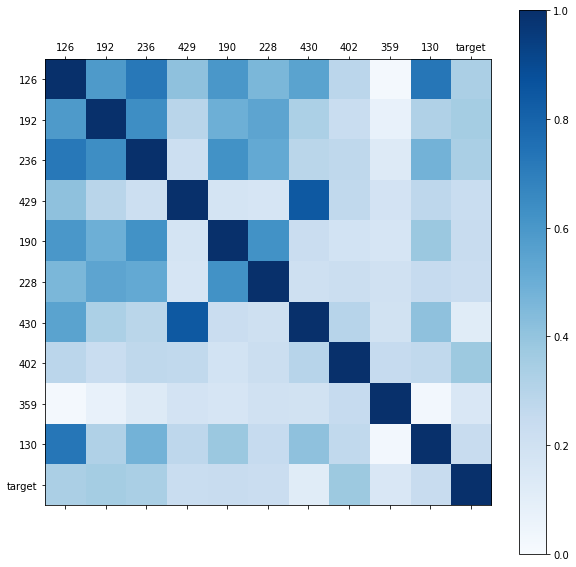

In [32]:
names = ['126', '192', '236', '429', '190', '228', '430', '402', '359', '130','target']
data = level1_df
correlations = data.corr().abs()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1,cmap=plt.cm.Blues)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [34]:
# level 1 plot prepare
level2_df = X_normalized[[126,120,130,236,127,287,267,268,265,306]]
level2_df ["target"] = Targets["Next_Year_Lvl_2"]

c:\users\suting yang\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


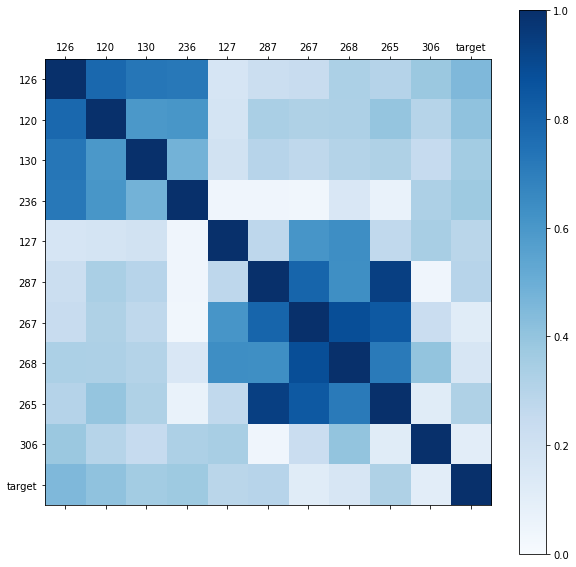

In [35]:
names = ['126','120','130','236','127','287','267','268','265','306','target']
data = level2_df
correlations = data.corr().abs()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1,cmap=plt.cm.Blues)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [36]:
# level 1 plot prepare
level3_df = X_normalized[[126,434,120,430,130,189,285,210,320,236]]
level3_df ["target"] = Targets["Next_Year_Lvl_3"]

c:\users\suting yang\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


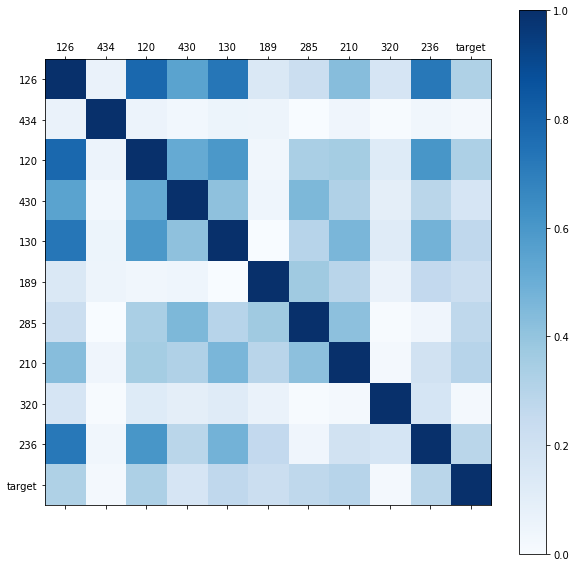

In [36]:
names = ['126','434','120','430','130','189','285','210','320','236','target']
data = level3_df
correlations = data.corr().abs()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1,cmap=plt.cm.Blues)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# EDA 3 - Chicago Crime Analysis in Detail

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
#Load Chicago crime database
crime_data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [38]:
crime_data[0:20]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,17.0,67.0,08B,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [39]:
#Get all the counts of each type of crime
count = crime_data.groupby(["Primary Type"])["ID"].count()
count = pd.DataFrame(count)
count_by_type = list(zip(count.index, count["ID"]))
count_by_type = pd.DataFrame(count_by_type, columns = ["Type","Occurence"])
rank_by_type = count_by_type.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type

,Type,Occurence
31,THEFT,329460
2,BATTERY,263700
6,CRIMINAL DAMAGE,155455
17,NARCOTICS,135240
1,ASSAULT,91289
24,OTHER OFFENSE,87874
3,BURGLARY,83397
8,DECEPTIVE PRACTICE,75495
16,MOTOR VEHICLE THEFT,61138
28,ROBBERY,57313


Text(0.5,1,'Crime Distribution: 2012-2017')

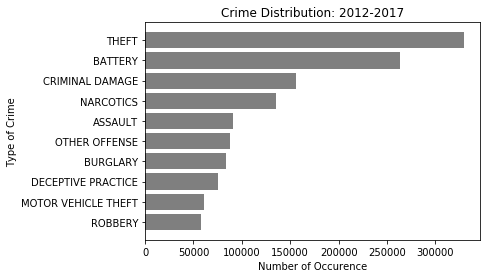

In [40]:
#Crime Distribution: 2012 - 2016
rank_by_type = rank_by_type.sort_values(['Occurence'],ascending = 1)
Occurence = list(rank_by_type["Occurence"])
Type = list(rank_by_type["Type"][0:10])
plt.barh(Type, Occurence, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Type of Crime', fontsize=10)
plt.title('Crime Distribution: 2012-2017')

In [41]:
#Split the date 
#Extract time(in hour), month, year of each intance
odd_date = [date.split('/') for date in crime_data["Date"]]
odd_date = pd.DataFrame(odd_date, columns = ["month","date","time"])
month = odd_date["month"].astype('int64')
date = odd_date["date"]
year = [time1.split(' ')[0] for time1 in odd_date["time"]]
time = [date.split(' ')[1].split(':')[0] for date in odd_date["time"]]
time_period = [date.split(' ')[2] for date in odd_date["time"]]

#Convert the time(hour) into 24-hours-a-day format 
time_period = np.array(time_period)
time = np.array(time).astype('int64')
time[time_period == 'PM'] = time[time_period == 'PM']  + 12

In [42]:
#Add new features to crime_data: month, time, year
crime_data["month"] = month
crime_data["year"] = year
crime_data["time"] = time
crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,year,time
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,2016,23
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,2016,21
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,2016,23
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,2016,22
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,2016,22


In [43]:
#Focus on the most recent year with sufficient data: 2016
crime_data_2016 = crime_data[crime_data['year']=='2016']
crime_data_2016.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,year,time
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,2016,23
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,2016,21
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,2016,23
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,2016,22
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,2016,22


c:\users\suting yang\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


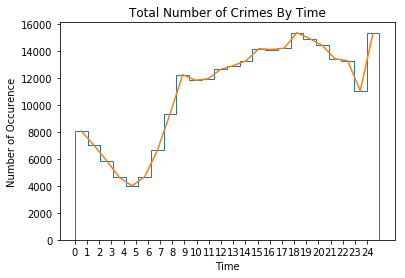

In [44]:
#Create an overall histogram of number of total crime occurence vs. time
time = crime_data_2016["time"]

plt.xlabel("Time")
plt.ylabel("Number of Occurence")
plt.title("Total Number of Crimes By Time")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 25), 
                   histtype=u'step', normed=False)  



plt.xticks(np.arange(0, 25, 1))
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)


plt.show()

c:\users\suting yang\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


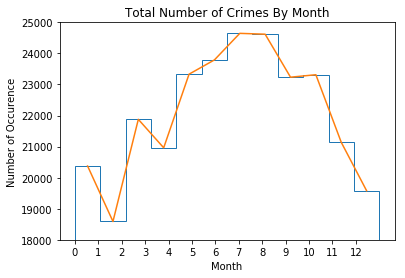

In [45]:
#Create an overall histogram of number of total crime occurence vs. Month
time = crime_data_2016["month"]

plt.xlabel("Month")
plt.ylabel("Number of Occurence")
plt.title("Total Number of Crimes By Month")
n, x, _ = plt.hist(time, bins=np.linspace(0, 13, 13), 
                   histtype=u'step', normed=False)  



plt.xticks(np.arange(0, 13, 1))
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
plt.ylim(18000, 25000)

plt.show()

In [46]:
#Analyze time of occurence by type
Theft_2016 = crime_data_2016[crime_data_2016["Primary Type"] == "THEFT"]
Battery_2016 = crime_data_2016[crime_data_2016["Primary Type"] == "BATTERY"]
Assault_2016 = crime_data_2016[crime_data_2016["Primary Type"] == "ASSAULT"]
Burglary_2016 = crime_data_2016[crime_data_2016["Primary Type"] == "BURGLARY"]
Robbery_2016 = crime_data_2016[crime_data_2016["Primary Type"] == "ROBBERY"]

c:\users\suting yang\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


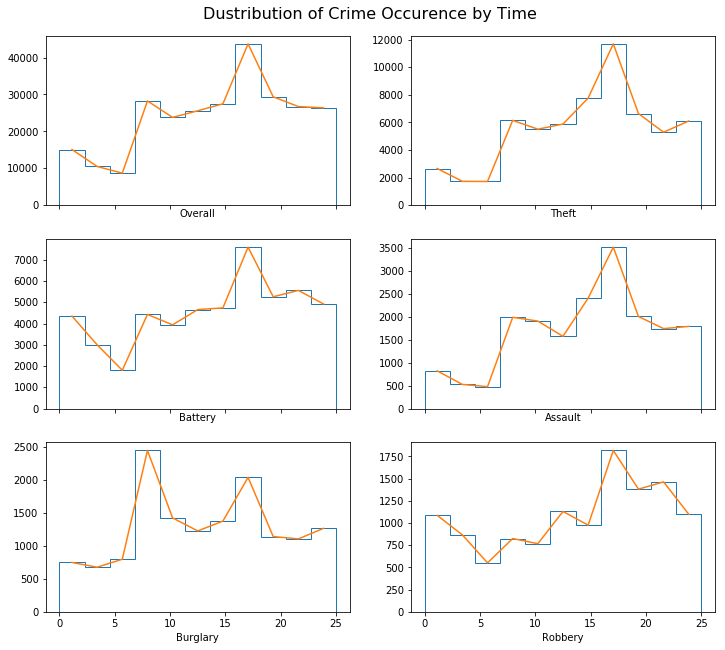

In [47]:
#Create an overall histogram of number of theft occurence vs. time
plt.figure(figsize=(12, 8))
#fig, axarr = plt.subplots(1,1)
plt.suptitle("Dustribution of Crime Occurence by Time", fontsize=16, x = 0.5, y = 1.05)
#Overall
ax5 = plt.subplot(321)
time = crime_data_2016["time"]

plt.xlabel("Overall")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 12), 
                   histtype=u'step', normed=False)  
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
#theft
time = Theft_2016["time"]
ax1 = plt.subplot(322)
plt.xlabel("Theft")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 12), 
                   histtype=u'step', normed=False)  
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
#battery
ax2 = plt.subplot(323)
time = Battery_2016["time"]
plt.xlabel("Battery")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 12), 
                   histtype=u'step', normed=False)  
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
#assault
ax3 = plt.subplot(324)
time = Assault_2016["time"]
plt.xlabel("Assault")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 12), 
                   histtype=u'step', normed=False)  
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
plt.subplots_adjust(bottom = 0, top = 1.0, hspace = 0.2)
#Burglary
ax4 = plt.subplot(325)
time = Burglary_2016["time"]
plt.xlabel("Burglary")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 12), 
                   histtype=u'step', normed=False)  
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
plt.subplots_adjust(bottom = 0, top = 1.0, hspace = 0.2)
#Robbery
ax6 = plt.subplot(326)
time = Robbery_2016["time"]
plt.xlabel("Robbery")
n, x, _ = plt.hist(time, bins=np.linspace(0, 25, 12), 
                   histtype=u'step', normed=False)  
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n)
plt.subplots_adjust(bottom = 0, top = 1.0, hspace = 0.2)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=True)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=True)
plt.setp(ax4.get_xticklabels(), visible=True)
plt.setp(ax4.get_yticklabels(), visible=True)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=True)
plt.setp(ax6.get_xticklabels(), visible=True)
plt.setp(ax6.get_yticklabels(), visible=True)

#fig.subplots_adjust(top=0.88)

plt.show()

In [48]:
crime_data_2016["Location Description"].head()

0    APARTMENT
1    RESIDENCE
2       STREET
3     SIDEWALK
4    RESIDENCE
Name: Location Description, dtype: object

Text(0.5,1,'Crime Location Distribution: 2012-2017')

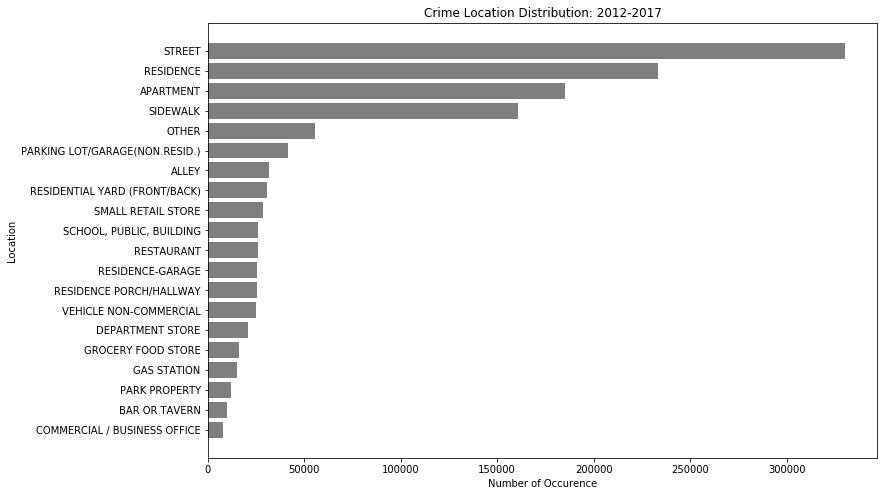

In [49]:
#Location: 2012 - 2016
#Get all the counts of each type of crime
count_2 = crime_data.groupby(["Location Description"])["ID"].count()
count_2 = pd.DataFrame(count_2)
count = count_2["ID"].astype('int64')
count_by_type_2 = list(zip(count_2.index, count))

count_by_type_2 = pd.DataFrame(count_by_type_2, columns = ['Type','Occurence'])
count_by_type_2["Occurence"] = pd.to_numeric(count_by_type_2["Occurence"])
rank_by_type_2 = count_by_type_2.sort_values(['Occurence'],ascending = 0)[0:20]
rank_by_type_2 = rank_by_type_2.sort_values(['Occurence'],ascending = 1)
Occurence_2 = list(rank_by_type_2["Occurence"])
Type_2 = list(rank_by_type_2["Type"][0:20])
plt.figure(figsize=(12, 8))
plt.barh(Type_2, Occurence_2, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Location', fontsize=10)
plt.title('Crime Location Distribution: 2012-2017')

Text(0.5,1,'Theft Location Distribution - 2016')

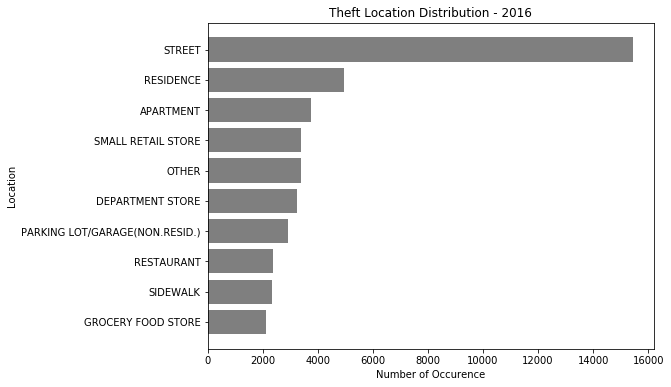

In [50]:
# 2016 - Theft Location
count_2 = Theft_2016.groupby(["Location Description"])["ID"].count()
count_2 = pd.DataFrame(count_2)
count = count_2["ID"].astype('int64')
count_by_type_2 = list(zip(count_2.index, count))

count_by_type_2 = pd.DataFrame(count_by_type_2, columns = ['Type','Occurence'])
count_by_type_2["Occurence"] = pd.to_numeric(count_by_type_2["Occurence"])
rank_by_type_2 = count_by_type_2.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type_2 = rank_by_type_2.sort_values(['Occurence'],ascending = 1)
Occurence_2 = list(rank_by_type_2["Occurence"])
Type_2 = list(rank_by_type_2["Type"][0:10])
plt.figure(figsize=(8, 6))
plt.barh(Type_2, Occurence_2, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Location', fontsize=10)
plt.title('Theft Location Distribution - 2016')

Text(0.5,1,'Battery Location Distribution - 2016')

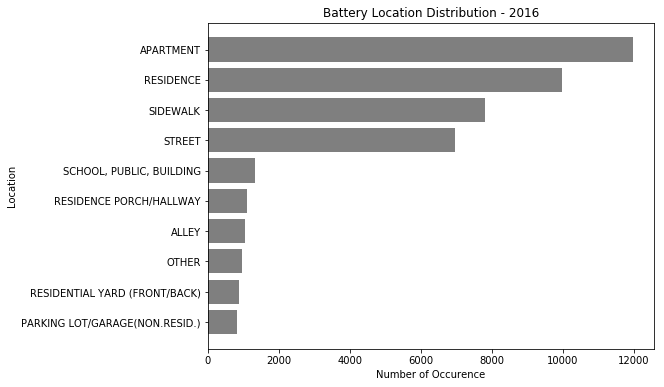

In [51]:
# 2016 - Theft Location
count_2 = Battery_2016.groupby(["Location Description"])["ID"].count()
count_2 = pd.DataFrame(count_2)
count = count_2["ID"].astype('int64')
count_by_type_2 = list(zip(count_2.index, count))

count_by_type_2 = pd.DataFrame(count_by_type_2, columns = ['Type','Occurence'])
count_by_type_2["Occurence"] = pd.to_numeric(count_by_type_2["Occurence"])
rank_by_type_2 = count_by_type_2.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type_2 = rank_by_type_2.sort_values(['Occurence'],ascending = 1)
Occurence_2 = list(rank_by_type_2["Occurence"])
Type_2 = list(rank_by_type_2["Type"][0:10])
plt.figure(figsize=(8, 6))
plt.barh(Type_2, Occurence_2, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Location', fontsize=10)
plt.title('Battery Location Distribution - 2016')

Text(0.5,1,'Assault Location Distribution - 2016')

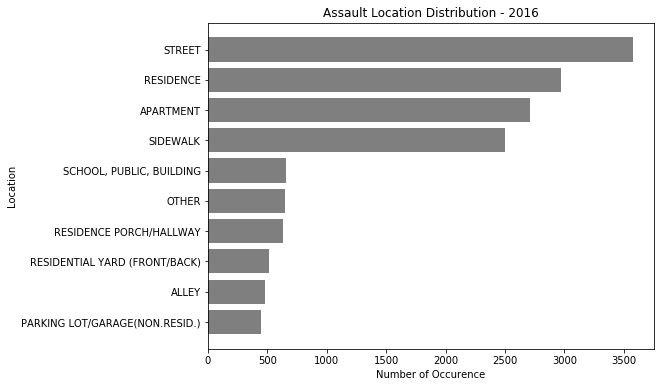

In [52]:
# 2016 - Assault Location
count_2 = Assault_2016.groupby(["Location Description"])["ID"].count()
count_2 = pd.DataFrame(count_2)
count = count_2["ID"].astype('int64')
count_by_type_2 = list(zip(count_2.index, count))

count_by_type_2 = pd.DataFrame(count_by_type_2, columns = ['Type','Occurence'])
count_by_type_2["Occurence"] = pd.to_numeric(count_by_type_2["Occurence"])
rank_by_type_2 = count_by_type_2.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type_2 = rank_by_type_2.sort_values(['Occurence'],ascending = 1)
Occurence_2 = list(rank_by_type_2["Occurence"])
Type_2 = list(rank_by_type_2["Type"][0:10])
plt.figure(figsize=(8, 6))
plt.barh(Type_2, Occurence_2, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Location', fontsize=10)
plt.title('Assault Location Distribution - 2016')

Text(0.5,1,'Burglary Location Distribution - 2016')

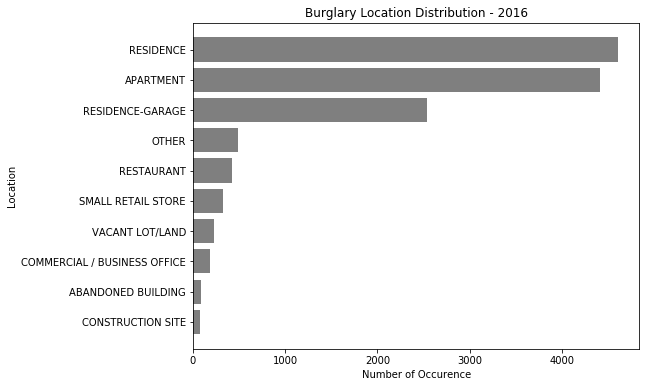

In [53]:
# 2016 - Burglary
count_2 = Burglary_2016.groupby(["Location Description"])["ID"].count()
count_2 = pd.DataFrame(count_2)
count = count_2["ID"].astype('int64')
count_by_type_2 = list(zip(count_2.index, count))

count_by_type_2 = pd.DataFrame(count_by_type_2, columns = ['Type','Occurence'])
count_by_type_2["Occurence"] = pd.to_numeric(count_by_type_2["Occurence"])
rank_by_type_2 = count_by_type_2.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type_2 = rank_by_type_2.sort_values(['Occurence'],ascending = 1)
Occurence_2 = list(rank_by_type_2["Occurence"])
Type_2 = list(rank_by_type_2["Type"][0:10])
plt.figure(figsize=(8, 6))
plt.barh(Type_2, Occurence_2, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Location', fontsize=10)
plt.title('Burglary Location Distribution - 2016')

Text(0.5,1,'Robbery Location Distribution - 2016')

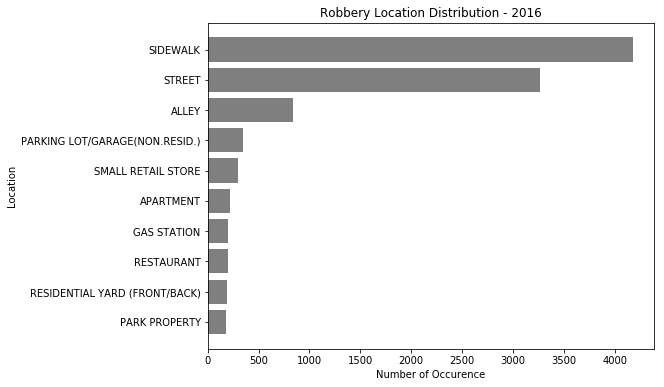

In [54]:
# 2016 - Robbery
count_2 = Robbery_2016.groupby(["Location Description"])["ID"].count()
count_2 = pd.DataFrame(count_2)
count = count_2["ID"].astype('int64')
count_by_type_2 = list(zip(count_2.index, count))

count_by_type_2 = pd.DataFrame(count_by_type_2, columns = ['Type','Occurence'])
count_by_type_2["Occurence"] = pd.to_numeric(count_by_type_2["Occurence"])
rank_by_type_2 = count_by_type_2.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type_2 = rank_by_type_2.sort_values(['Occurence'],ascending = 1)
Occurence_2 = list(rank_by_type_2["Occurence"])
Type_2 = list(rank_by_type_2["Type"][0:10])
plt.figure(figsize=(8, 6))
plt.barh(Type_2, Occurence_2, color = 'tab:gray')
plt.xlabel('Number of Occurence', fontsize=10)
plt.ylabel('Location', fontsize=10)
plt.title('Robbery Location Distribution - 2016')

In [55]:
theft_data = crime_data[crime_data["Primary Type"]=="ASSAULT"]
count_year = theft_data.groupby(["Year"])["ID"].count()

In [56]:
count = crime_data.groupby(["Primary Type"])["ID"].count()
count = pd.DataFrame(count)
count_by_type = list(zip(count.index, count["ID"]))
count_by_type = pd.DataFrame(count_by_type, columns = ["Type","Occurence"])
rank_by_type = count_by_type.sort_values(['Occurence'],ascending = 0)[0:10]
rank_by_type

,Type,Occurence
31,THEFT,329460
2,BATTERY,263700
6,CRIMINAL DAMAGE,155455
17,NARCOTICS,135240
1,ASSAULT,91289
24,OTHER OFFENSE,87874
3,BURGLARY,83397
8,DECEPTIVE PRACTICE,75495
16,MOTOR VEHICLE THEFT,61138
28,ROBBERY,57313


In [57]:
#Creat a box plot for each year data
#Extract the data for each year
year_2012 = crime_data[crime_data["Year"]==2012]
year_2013 = crime_data[crime_data["Year"]==2013]
year_2014 = crime_data[crime_data["Year"]==2014]
year_2015 = crime_data[crime_data["Year"]==2015]
year_2016 = crime_data[crime_data["Year"]==2016]

In [58]:
#Extract the crime occurence by month for each year
year_2012_month = year_2012.groupby(["month"])["ID"].count()
year_2013_month = year_2013.groupby(["month"])["ID"].count()
year_2014_month = year_2014.groupby(["month"])["ID"].count()
year_2015_month = year_2015.groupby(["month"])["ID"].count()
year_2016_month = year_2016.groupby(["month"])["ID"].count()

([<matplotlib.axis.XTick at 0x1d1cecea2e8>,
 <a list of 5 Text xticklabel objects>)

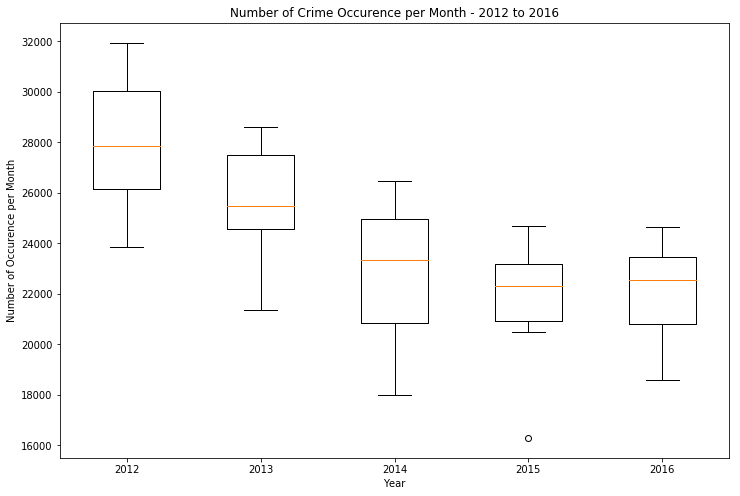

In [59]:
plt.figure(figsize=(12, 8))
bp = plt.boxplot([year_2012_month,year_2013_month,year_2014_month,year_2015_month,year_2016_month])
plt.xlabel("Year")
plt.ylabel("Number of Occurence per Month")
plt.title("Number of Crime Occurence per Month - 2012 to 2016")
plt.xticks([1,2,3,4,5],["2012","2013","2014","2015","2016"])

In [60]:
#Plot line charts of number of crimes by crime type
crime_data = crime_data[crime_data["year"]!='2017']
theft = crime_data[crime_data["Primary Type"]=="THEFT"]
Battery = crime_data[crime_data["Primary Type"]=="BATTERY"]
Criminal_Damage = crime_data[crime_data["Primary Type"]=="CRIMINAL DAMAGE"]
Narcotics = crime_data[crime_data["Primary Type"]=="NARCOTICS"]
Assault = crime_data[crime_data["Primary Type"] == "ASSAULT"]
Burglary = crime_data[crime_data["Primary Type"] =="BURGLARY"]
Robbery = crime_data[crime_data["Primary Type"]=="ROBBERY"]

In [61]:
#Calculate number of occurences by crime type by year
theft_year = theft.groupby(['year'])["ID"].count()
Battery_year = Battery.groupby(['year'])["ID"].count()
Criminal_Damage_year = Criminal_Damage.groupby(['year'])["ID"].count()
Narcotics_year = Narcotics.groupby(['year'])["ID"].count()
Assault_year = Assault.groupby(['year'])["ID"].count()
Burglary_year = Burglary.groupby(['year'])["ID"].count()
Robbery_year = Robbery.groupby(['year'])["ID"].count()

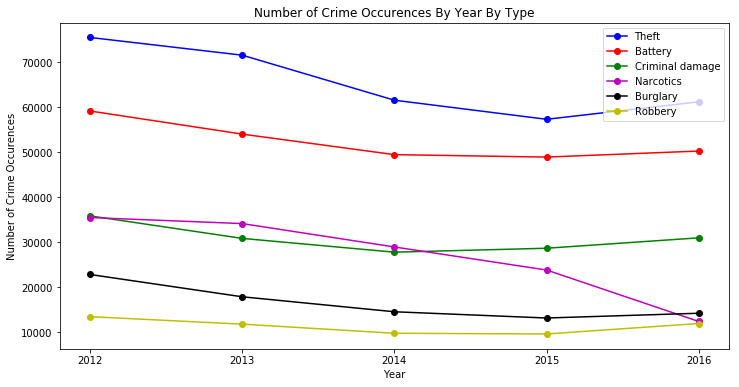

In [62]:
#Plot line chart of number of occurences by crime type by year
x = ["2012","2013","2014","2015","2016"]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x,theft_year,'-b',marker='o',label = 'Theft')
ax.plot(x,Battery_year,'-r',marker='o',label = 'Battery')
ax.plot(x,Criminal_Damage_year,'-g',marker='o',label = 'Criminal damage')
ax.plot(x,Narcotics_year,'-m',marker='o',label = 'Narcotics')
ax.plot(x,Burglary_year,'-k',marker='o',label = 'Burglary')
ax.plot(x,Robbery_year,'-y',marker='o',label = 'Robbery')

plt.xlabel("Year")
plt.ylabel("Number of Crime Occurences")
plt.title("Number of Crime Occurences By Year By Type")
leg = ax.legend()

# Regression 

In [37]:
#Load Library 
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
#Rank the features based on information gain
rank_Lvl_1 = Lvl_1.sort_values(['IG'],ascending = 0)
#Select the top 200 features and print out the header
rank_Lvl_1_selected = rank_Lvl_1[0:100]
#rank_Lvl_1_selected.head()
index = rank_Lvl_1_selected.ix[:,0].index
#for i = range (len(index)):
X = pd.DataFrame()
# print(Features.iloc[:,126])
index = list(map(lambda x:int(x), index))

print(type(index[0]))
for i in index:
    X[i]=Features.iloc[:,i]

#print(X)

#Preprocessing 
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X)
# y = scaler.fit(y)



<class 'int'>
[[0.07577011 0.45205479 0.03578154 ... 0.23563371 0.16050354 0.1611479 ]
 [0.21921839 0.456621   0.21280603 ... 0.32986065 0.28461841 0.15673289]
 [0.16698851 0.32876712 0.27118644 ... 0.13868613 0.0700236  0.1611479 ]
 ...
 [0.04910345 0.43531202 0.09981168 ... 0.11254147 0.03186467 0.22737307]
 [0.02       0.4414003  0.02071563 ... 0.07584605 0.02380016 0.15673289]
 [0.18712644 0.33637747 0.04896422 ... 0.18785667 0.03540519 0.13465784]]


C:\Users\vamj2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [39]:
def model_run(model,X_train, X_test, y_train, y_test):
#     X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.7, random_state=0)
    y_pre = cross_val_predict(model, X_train, y_train, cv = 5)
    y_pre = list(map(lambda x:int(x), y_pre))
    train = explained_variance_score(y_train, y_pre)
    train_mae = mean_absolute_error(y_train, y_pre)
    train_mse = mean_squared_error(y_train, y_pre)
    train_r = r2_score(y_train, y_pre)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    prediction = list(map(lambda x:int(x), prediction))
    test = explained_variance_score(y_test, prediction)
    test_mae = mean_absolute_error(y_test, prediction)
    test_mse = mean_squared_error(y_test, prediction)
    test_r = r2_score(y_test, prediction)
    print('The explained_variance_score of the model on train dataset is {0:.5f}%'.format(train*100))
    print('The explained_variance_score of the model on test dataset is {0:.5f}%'.format(test*100))
    print('The mean_absolute_error of the model on train dataset is {0:.5f}'.format(train_mae))
    print('The mean_absolute_error of the model on test dataset is {0:.5f}'.format(test_mae))
    print('The mean_squared_error of the model on train dataset is {0:.5f}'.format(train_mse))
    print('The mean_squared_error of the model on test dataset is {0:.5f}'.format(test_mse))
    print('The R² score of the model on train dataset is {0:.5f}'.format(train_r))
    print('The R² score of the model on test dataset is {0:.5f}'.format(test_r))



# Linear Regression - Ridge

# Hyperparameter Tuning

In [40]:
scores = ['precision', 'recall','f1-score']
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# reg = linear_model.Ridge()
# clf = GridSearchCV(reg, parameters, cv=16)
# X = Features.iloc[:,2:438]
# clf.fit(X, Targets.Next_Year_Lvl_1)
# sorted(clf.cv_results_.keys())
#X = Features.iloc[:,2:438]
y = Targets.Next_Year_Lvl_1
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)


# scalerX = StandardScaler().fit(X_train)
# scalery = StandardScaler().fit(y_train)
# X_train = scalerX.transform(X_train)
# y_train = scalery.transform(y_train)
# X_test = scalerX.transform(X_test)
# y_test = scalery.transform(y_test)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    reg = linear_model.Ridge(normalize=True)
    clf = GridSearchCV(reg, parameters, cv=10)
   
    clf.fit(X, y)
#     sorted(clf.cv_results_.keys())
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_pred = clf.predict(X_test)
    y_pred = list(map(lambda x:int(x), y_pred))
    print(type(y_pred[1]))
    print(classification_report(y_test, y_pred))
    print()


C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.301797e-17
  overwrite_a=True).T


# Tuning hyper-parameters for precision



C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.422044e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.567527e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.715126e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.660499e-17
  overwrite_a=True).T
C:\Users

Best parameters set found on development set:

{'alpha': 0.001}

Grid scores on development set:

0.384 (+/-0.205) for {'alpha': 1e-15}
0.384 (+/-0.205) for {'alpha': 1e-10}
0.385 (+/-0.205) for {'alpha': 1e-08}
0.386 (+/-0.200) for {'alpha': 0.0001}
0.387 (+/-0.198) for {'alpha': 0.001}
0.386 (+/-0.195) for {'alpha': 0.01}
0.357 (+/-0.139) for {'alpha': 1}
0.288 (+/-0.124) for {'alpha': 5}
0.224 (+/-0.143) for {'alpha': 10}
0.132 (+/-0.198) for {'alpha': 20}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

<class 'int'>
             precision    recall  f1-score   support

        -11       0.00      0.00      0.00         0
        -10       0.00      0.00      0.00         0
         -6       0.00      0.00      0.00         0
         -4       0.00      0.00      0.00         0
         -2       0.00      0.00      0.00         0
          0       0.00      0.00      0.00        18
          1  

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.301797e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.422044e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaco

Best parameters set found on development set:

{'alpha': 0.001}

Grid scores on development set:

0.384 (+/-0.205) for {'alpha': 1e-15}
0.384 (+/-0.205) for {'alpha': 1e-10}
0.385 (+/-0.205) for {'alpha': 1e-08}
0.386 (+/-0.200) for {'alpha': 0.0001}
0.387 (+/-0.198) for {'alpha': 0.001}
0.386 (+/-0.195) for {'alpha': 0.01}
0.357 (+/-0.139) for {'alpha': 1}
0.288 (+/-0.124) for {'alpha': 5}
0.224 (+/-0.143) for {'alpha': 10}
0.132 (+/-0.198) for {'alpha': 20}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

<class 'int'>
             precision    recall  f1-score   support

        -11       0.00      0.00      0.00         0
        -10       0.00      0.00      0.00         0
         -6       0.00      0.00      0.00         0
         -4       0.00      0.00      0.00         0
         -2       0.00      0.00      0.00         0
          0       0.00      0.00      0.00        18
          1  

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.301797e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.422044e-17
  overwrite_a=True).T
C:\Users\vamj2\Anaco

Best parameters set found on development set:

{'alpha': 0.001}

Grid scores on development set:

0.384 (+/-0.205) for {'alpha': 1e-15}
0.384 (+/-0.205) for {'alpha': 1e-10}
0.385 (+/-0.205) for {'alpha': 1e-08}
0.386 (+/-0.200) for {'alpha': 0.0001}
0.387 (+/-0.198) for {'alpha': 0.001}
0.386 (+/-0.195) for {'alpha': 0.01}
0.357 (+/-0.139) for {'alpha': 1}
0.288 (+/-0.124) for {'alpha': 5}
0.224 (+/-0.143) for {'alpha': 10}
0.132 (+/-0.198) for {'alpha': 20}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

<class 'int'>
             precision    recall  f1-score   support

        -11       0.00      0.00      0.00         0
        -10       0.00      0.00      0.00         0
         -6       0.00      0.00      0.00         0
         -4       0.00      0.00      0.00         0
         -2       0.00      0.00      0.00         0
          0       0.00      0.00      0.00        18
          1  

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Model Implementation

In [41]:
model = linear_model.Ridge (alpha = 0.01, normalize=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
y_pre = cross_val_predict(model, X_train, y_train, cv = 5)
y_pre = list(map(lambda x:int(x), y_pre))
train = explained_variance_score(y_train, y_pre)
train_mae = mean_absolute_error(y_train, y_pre)
train_mse = mean_squared_error(y_train, y_pre)
train_r = r2_score(y_train, y_pre)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction = list(map(lambda x:int(x), prediction))
test = explained_variance_score(y_test, prediction)
test_mae = mean_absolute_error(y_test, prediction)
test_mse = mean_squared_error(y_test, prediction)
test_r = r2_score(y_test, prediction)
print('The explained_variance_score of the model on train dataset is {0:.5f}%'.format(train*100))
print('The explained_variance_score of the model on test dataset is {0:.5f}%'.format(test*100))
print('The mean_absolute_error of the model on train dataset is {0:.5f}'.format(train_mae))
print('The mean_absolute_error of the model on test dataset is {0:.5f}'.format(test_mae))
print('The mean_squared_error of the model on train dataset is {0:.5f}'.format(train_mse))
print('The mean_squared_error of the model on test dataset is {0:.5f}'.format(test_mse))
print('The R² score of the model on train dataset is {0:.5f}'.format(train_r))
print('The R² score of the model on test dataset is {0:.5f}'.format(test_r))

The explained_variance_score of the model on train dataset is 43.97643%
The explained_variance_score of the model on test dataset is 49.95492%
The mean_absolute_error of the model on train dataset is 11.58863
The mean_absolute_error of the model on test dataset is 10.86390
The mean_squared_error of the model on train dataset is 318.47157
The mean_squared_error of the model on test dataset is 289.79011
The R² score of the model on train dataset is 0.43924
The R² score of the model on test dataset is 0.49777


# Polynomial Regression 

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [43]:
# lin_regressor = LinearRegression(normalize=True)

# # pass the order of your polynomial here  
# poly = PolynomialFeatures(3)

# # X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, test_size=0.7, random_state=0)

# # convert to be used further to linear regression
# X_transform = poly.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(
#     X_transform, y, test_size=0.7, random_state=0)

# # fit this to Linear Regressor
# # model = lin_regressor.fit(X_train,y_train) 

# model_run(lin_regressor,X_train, X_test, y_train, y_test)





# Linear Regression - Lasso

In [44]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01, normalize=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)

The explained_variance_score of the model on train dataset is 44.62672%
The explained_variance_score of the model on test dataset is 48.56029%
The mean_absolute_error of the model on train dataset is 11.23411
The mean_absolute_error of the model on test dataset is 10.79370
The mean_squared_error of the model on train dataset is 314.83779
The mean_squared_error of the model on test dataset is 297.84742
The R² score of the model on train dataset is 0.44564
The R² score of the model on test dataset is 0.48380


# KNeighborsRegressor

In [45]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=12)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)

The explained_variance_score of the model on train dataset is 42.09978%
The explained_variance_score of the model on test dataset is 47.49953%
The mean_absolute_error of the model on train dataset is 11.24582
The mean_absolute_error of the model on test dataset is 10.87285
The mean_squared_error of the model on train dataset is 328.95151
The mean_squared_error of the model on test dataset is 303.17156
The R² score of the model on train dataset is 0.42078
The R² score of the model on test dataset is 0.47458


# MLPRegressor

In [46]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(20,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)

The explained_variance_score of the model on train dataset is 47.41824%
The explained_variance_score of the model on test dataset is 51.43690%
The mean_absolute_error of the model on train dataset is 10.57023
The mean_absolute_error of the model on test dataset is 10.31340
The mean_squared_error of the model on train dataset is 299.45318
The mean_squared_error of the model on test dataset is 281.89362
The R² score of the model on train dataset is 0.47273
The R² score of the model on test dataset is 0.51145


# Decision Tree Regression

In [47]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)


The explained_variance_score of the model on train dataset is 14.84007%
The explained_variance_score of the model on test dataset is 30.02751%
The mean_absolute_error of the model on train dataset is 13.45987
The mean_absolute_error of the model on test dataset is 12.64040
The mean_squared_error of the model on train dataset is 483.79097
The mean_squared_error of the model on test dataset is 404.75788
The R² score of the model on train dataset is 0.14814
The R² score of the model on test dataset is 0.29852


# Classification

|Definition| Rare(less than 5 times per yr) | Sometimes (5 - 20)|Frequently (20 - 50)|Commonly (greater than 50)|
|------|------|------|------|------|
|**Occurrence**| 228  | 1706|1578|476|

In [48]:
y = Targets.Next_Year_Lvl_1
y_new= []
for i in y:
    if i<5:
        y_new.append(1)
    elif i<20:
        y_new.append(2)
    elif i<50:
        y_new.append(3)
    else:
        y_new.append(4)

print(X.shape)
print(len(y))

    

(3988, 100)
3988


In [54]:
from sklearn.linear_model import LogisticRegression
scores = ['precision', 'recall','f1-score']
parameters = {'C':[0.01,0.05,0.25,0.5,1.0,5.0,10.0]}
# reg = linear_model.Ridge()
# clf = GridSearchCV(reg, parameters, cv=16)
# X = Features.iloc[:,2:438]
# clf.fit(X, Targets.Next_Year_Lvl_1)
# sorted(clf.cv_results_.keys())
#X = Features.iloc[:,2:438]
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)


# scalerX = StandardScaler().fit(X_train)
# scalery = StandardScaler().fit(y_train)
# X_train = scalerX.transform(X_train)
# y_train = scalery.transform(y_train)
# X_test = scalerX.transform(X_test)
# y_test = scalery.transform(y_test)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    reg = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
    clf = GridSearchCV(reg, parameters, cv=7)
   
    clf.fit(X, y)
#     sorted(clf.cv_results_.keys())
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_pred = clf.predict(X_test)
    y_pred = list(map(lambda x:int(x), y_pred))
    print(type(y_pred[1]))
    print(classification_report(y_test, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 5.0}

Grid scores on development set:

0.587 (+/-0.098) for {'C': 0.01}
0.603 (+/-0.087) for {'C': 0.05}
0.617 (+/-0.076) for {'C': 0.25}
0.620 (+/-0.074) for {'C': 0.5}
0.622 (+/-0.067) for {'C': 1.0}
0.624 (+/-0.066) for {'C': 5.0}
0.619 (+/-0.060) for {'C': 10.0}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

<class 'int'>
             precision    recall  f1-score   support

          1       0.60      0.11      0.18       169
          2       0.67      0.79      0.72      1168
          3       0.65      0.66      0.65      1124
          4       0.70      0.49      0.58       331

avg / total       0.66      0.66      0.65      2792


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 5.0}

Grid scores on development set:

0.587 (+/-0.098) for {'C': 0.01}
0.6

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score

y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model = LogisticRegression(C= 5.0,solver = 'lbfgs',multi_class='multinomial')
y_pre = cross_val_predict(model, X_train, y_train, cv = 10)
error = accuracy_score(y_train, y_pre)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
test_error = accuracy_score(y_test, prediction)

m = confusion_matrix(y_test, prediction)
print(m)
print('training accuracy:',error)
print('testing accuracy',test_error)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=2)
auc = metrics.auc(fpr, tpr)
print('AUC:',auc)
precision, recall, fscore, support = score(y_test, prediction,average='macro')
print('Macro:')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision, recall, fscore, support = score(y_test, prediction,average='micro')
print('Micro:')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

[[ 14 148   7   0]
 [  8 908 238  14]
 [  0 355 680  89]
 [  0  12 155 164]]
training accuracy: 0.6362876254180602
testing accuracy 0.6325214899713467
AUC: 0.2602460312774141
Macro:
precision: 0.6295785052644671
recall: 0.4901719953279191
fscore: 0.5032598552936767
Micro:
precision: 0.6325214899713467
recall: 0.6325214899713467
fscore: 0.6325214899713467


In [56]:
def clf_model_run(model,X_train, X_test, y_train, y_test):
    y_pre = cross_val_predict(model, X_train, y_train, cv = 10)
    error = accuracy_score(y_train, y_pre)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    test_error = accuracy_score(y_test, prediction)

    m = confusion_matrix(y_test, prediction)
    print(m)
    print('training accuracy:',error)
    print('testing accuracy',test_error)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=2)
    auc = metrics.auc(fpr, tpr)
    print('AUC:',auc)
    precision, recall, fscore, support = score(y_test, prediction,average='macro')
    print('Macro:')
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))

    precision, recall, fscore, support = score(y_test, prediction,average='micro')
    print('Micro:')
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))


# Stochastic Gradient Descent

Stochastic Gradient Descent
Definition: Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

Advantages: Efficiency and ease of implementation.

Disadvantages: Requires a number of hyper-parameters and it is sensitive to feature scaling.

In [57]:
model = linear_model.SGDClassifier(alpha=1e-15,max_iter=1000,shuffle=True)
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

[[  8 133  27   1]
 [  2 635 503  28]
 [  0 187 787 150]
 [  0   9 125 197]]
training accuracy: 0.5560200668896321
testing accuracy 0.5827363896848138
AUC: 0.2930227874687901
Macro:
precision: 0.6321049068437976
recall: 0.4715864401883018
fscore: 0.46394016430548446
Micro:
precision: 0.5827363896848138
recall: 0.5827363896848138
fscore: 0.5827363896848138


In [58]:
from sklearn.neighbors import KNeighborsClassifier
sc = ['precision', 'recall','f1-score']
parameters = {'n_neighbors':[2,3,4,5,10,12,15]}
# reg = linear_model.Ridge()
# clf = GridSearchCV(reg, parameters, cv=16)
# X = Features.iloc[:,2:438]
# clf.fit(X, Targets.Next_Year_Lvl_1)
# sorted(clf.cv_results_.keys())
#X = Features.iloc[:,2:438]
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)


# scalerX = StandardScaler().fit(X_train)
# scalery = StandardScaler().fit(y_train)
# X_train = scalerX.transform(X_train)
# y_train = scalery.transform(y_train)
# X_test = scalerX.transform(X_test)
# y_test = scalery.transform(y_test)

for s in sc:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    reg = KNeighborsClassifier()
    clf = GridSearchCV(reg, parameters, cv=7)
   
    clf.fit(X, y)
#     sorted(clf.cv_results_.keys())
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_pred = clf.predict(X_test)


    print(classification_report(y_test, y_pred))
    print()

# Tuning hyper-parameters for <function precision_recall_fscore_support at 0x0000018F9128BD90>

Best parameters set found on development set:

{'n_neighbors': 2}

Grid scores on development set:

0.650 (+/-0.060) for {'n_neighbors': 2}
0.646 (+/-0.089) for {'n_neighbors': 3}
0.646 (+/-0.075) for {'n_neighbors': 4}
0.637 (+/-0.099) for {'n_neighbors': 5}
0.614 (+/-0.104) for {'n_neighbors': 10}
0.617 (+/-0.104) for {'n_neighbors': 12}
0.610 (+/-0.092) for {'n_neighbors': 15}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.68      1.00      0.81       169
          2       0.80      0.93      0.86      1168
          3       0.90      0.75      0.82      1124
          4       1.00      0.69      0.82       331

avg / total       0.85      0.84      0.83      2792


# Tuning hyper-parameters for <function precision_recall_fscor

# K-Nearest Neighbours

Definition: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

Disadvantages: Need to determine the value of K and the computation cost is high as it needs to computer the distance of each instance to all the training samples.

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

[[ 34 114  21   0]
 [ 73 797 281  17]
 [ 23 359 651  91]
 [  2  28 141 160]]
training accuracy: 0.5568561872909699
testing accuracy 0.58810888252149
AUC: 0.2877882701261894
Macro:
precision: 0.5159190599930884
recall: 0.4865279065284547
fscore: 0.49838589325716687
Micro:
precision: 0.58810888252149
recall: 0.58810888252149
fscore: 0.58810888252149


# Decision Tree

Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalise well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10,random_state=0,min_samples_leaf=5)
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)


[[ 40 113  16   0]
 [ 66 769 314  19]
 [  7 410 616  91]
 [  3  28 148 152]]
training accuracy: 0.5418060200668896
testing accuracy 0.5648280802292264
AUC: 0.3119311567919563
Macro:
precision: 0.5176568283818526
recall: 0.47558350190708926
fscore: 0.4917429692395628
Micro:
precision: 0.5648280802292264
recall: 0.5648280802292264
fscore: 0.5648280802292264


# Random Forest

Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70, max_depth=5,random_state=0,min_samples_leaf=10)
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)


[[  0 158  11   0]
 [  0 958 209   1]
 [  0 401 682  41]
 [  0  20 184 127]]
training accuracy: 0.6429765886287625
testing accuracy 0.6328796561604585
AUC: 0.25913654978406103
Macro:
precision: 0.5006910127448672
recall: 0.45266321147314587
fscore: 0.45837812497386266
Micro:
precision: 0.6328796561604585
recall: 0.6328796561604585
fscore: 0.6328796561604585


C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Machine

Support Vector Machine
Definition: Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

Advantages: Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

Disadvantages: The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

In [62]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)


[[  0 159  10   0]
 [  0 957 211   0]
 [  0 452 672   0]
 [  0  25 306   0]]
training accuracy: 0.5877926421404682
testing accuracy 0.5834527220630372
AUC: 0.2861381503475268
Macro:
precision: 0.29030508788711246
recall: 0.3543035209379418
fscore: 0.3179473239199895
Micro:
precision: 0.5834527220630372
recall: 0.5834527220630372
fscore: 0.5834527220630372


C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
model = SVC(gamma='auto',C=1,kernel="linear")
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

[[  0 160   9   0]
 [  0 959 203   6]
 [  0 388 666  70]
 [  0  13 170 148]]
training accuracy: 0.6337792642140468
testing accuracy 0.6350286532951289
AUC: 0.2518620520952831
Macro:
precision: 0.4817828803879929
recall: 0.46517956089815865
fscore: 0.46503366712707184
Micro:
precision: 0.6350286532951289
recall: 0.6350286532951289
fscore: 0.6350286532951289


C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
model = SVC(gamma='auto',C=0.0005,kernel="poly")
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

[[   0  169    0    0]
 [   0 1168    0    0]
 [   0 1124    0    0]
 [   0  331    0    0]]
training accuracy: 0.4498327759197324
testing accuracy 0.4183381088825215
AUC: 0.5
Macro:
precision: 0.10458452722063037
recall: 0.25
fscore: 0.14747474747474748
Micro:
precision: 0.4183381088825215
recall: 0.4183381088825215
fscore: 0.4183381088825215


C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naïve Bayes

Naïve Bayes
Definition: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

Advantages: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

Disadvantages: Naive Bayes is is known to be a bad estimator.

In [65]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

[[ 31 110  20   8]
 [ 70 755 220 123]
 [ 34 495 327 268]
 [  4  32 102 193]]
training accuracy: 0.4707357859531773
testing accuracy 0.4677650429799427
AUC: 0.3535347358121331
Macro:
precision: 0.3950523478466881
recall: 0.42596072503816407
fscore: 0.39352394517408523
Micro:
precision: 0.4677650429799427
recall: 0.4677650429799427
fscore: 0.46776504297994265


In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

[[109  42  15   3]
 [452 415 213  88]
 [133 276 407 308]
 [  4  17  49 261]]
training accuracy: 0.4122073578595318
testing accuracy 0.4269340974212034
AUC: 0.27353872140495306
Macro:
precision: 0.42499439425167074
recall: 0.5377244787424038
fscore: 0.4152865245363914
Micro:
precision: 0.4269340974212034
recall: 0.4269340974212034
fscore: 0.4269340974212034


# neural network: MLPClassifier 

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=0,tol=0.000000001)

y = y_new
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
clf_model_run(model,X_train, X_test, y_train, y_test)

Iteration 1, loss = 1.34709235
Iteration 2, loss = 1.32382349
Iteration 3, loss = 1.29263784
Iteration 4, loss = 1.26237162
Iteration 5, loss = 1.23495401
Iteration 6, loss = 1.21175749
Iteration 7, loss = 1.19291247
Iteration 8, loss = 1.17761958
Iteration 9, loss = 1.16550439
Iteration 10, loss = 1.15560805
Iteration 11, loss = 1.14780636
Iteration 12, loss = 1.14145548
Iteration 13, loss = 1.13587556
Iteration 14, loss = 1.13145763
Iteration 15, loss = 1.12739230
Iteration 16, loss = 1.12393134
Iteration 17, loss = 1.12122443
Iteration 18, loss = 1.11828009
Iteration 19, loss = 1.11596048
Iteration 20, loss = 1.11372205
Iteration 21, loss = 1.11157408
Iteration 22, loss = 1.10949986
Iteration 23, loss = 1.10755057
Iteration 24, loss = 1.10576469
Iteration 25, loss = 1.10376464
Iteration 26, loss = 1.10199442
Iteration 27, loss = 1.10025499
Iteration 28, loss = 1.09839289
Iteration 29, loss = 1.09666284
Iteration 30, loss = 1.09474950
Iteration 31, loss = 1.09295643
Iteration 32, los

Iteration 261, loss = 0.82634253
Iteration 262, loss = 0.82622541
Iteration 263, loss = 0.82596449
Iteration 264, loss = 0.82519368
Iteration 265, loss = 0.82516436
Iteration 266, loss = 0.82467287
Iteration 267, loss = 0.82439446
Iteration 268, loss = 0.82419222
Iteration 269, loss = 0.82379052
Iteration 270, loss = 0.82391198
Iteration 271, loss = 0.82324964
Iteration 272, loss = 0.82309104
Iteration 273, loss = 0.82332883
Iteration 274, loss = 0.82251421
Iteration 275, loss = 0.82222794
Iteration 276, loss = 0.82196461
Iteration 277, loss = 0.82187827
Iteration 278, loss = 0.82134393
Iteration 279, loss = 0.82110344
Iteration 280, loss = 0.82100548
Iteration 281, loss = 0.82066349
Iteration 282, loss = 0.82073533
Iteration 283, loss = 0.82018190
Iteration 284, loss = 0.81982865
Iteration 285, loss = 0.81972326
Iteration 286, loss = 0.81958438
Iteration 287, loss = 0.81902319
Iteration 288, loss = 0.81880489
Iteration 289, loss = 0.81867482
Iteration 290, loss = 0.81855439
Iteration 

Iteration 89, loss = 0.96181289
Iteration 90, loss = 0.95974087
Iteration 91, loss = 0.95773192
Iteration 92, loss = 0.95584275
Iteration 93, loss = 0.95382400
Iteration 94, loss = 0.95179241
Iteration 95, loss = 0.94988722
Iteration 96, loss = 0.94822065
Iteration 97, loss = 0.94640636
Iteration 98, loss = 0.94456275
Iteration 99, loss = 0.94282830
Iteration 100, loss = 0.94092286
Iteration 101, loss = 0.93928402
Iteration 102, loss = 0.93761834
Iteration 103, loss = 0.93598393
Iteration 104, loss = 0.93435158
Iteration 105, loss = 0.93294394
Iteration 106, loss = 0.93129442
Iteration 107, loss = 0.92981646
Iteration 108, loss = 0.92822844
Iteration 109, loss = 0.92697978
Iteration 110, loss = 0.92520201
Iteration 111, loss = 0.92364899
Iteration 112, loss = 0.92253388
Iteration 113, loss = 0.92089595
Iteration 114, loss = 0.91951654
Iteration 115, loss = 0.91841720
Iteration 116, loss = 0.91722270
Iteration 117, loss = 0.91566056
Iteration 118, loss = 0.91431960
Iteration 119, loss =

Iteration 338, loss = 0.80022112
Iteration 339, loss = 0.79980696
Iteration 340, loss = 0.79989868
Iteration 341, loss = 0.80002764
Iteration 342, loss = 0.79940046
Iteration 343, loss = 0.79921125
Iteration 344, loss = 0.79874663
Iteration 345, loss = 0.79852439
Iteration 346, loss = 0.79840143
Iteration 347, loss = 0.79796686
Iteration 348, loss = 0.79757723
Iteration 349, loss = 0.79757369
Iteration 350, loss = 0.79717084
Iteration 351, loss = 0.79700154
Iteration 352, loss = 0.79681203
Iteration 353, loss = 0.79613364
Iteration 354, loss = 0.79653742
Iteration 355, loss = 0.79602477
Iteration 356, loss = 0.79565199
Iteration 357, loss = 0.79565061
Iteration 358, loss = 0.79535350
Iteration 359, loss = 0.79510404
Iteration 360, loss = 0.79498742
Iteration 361, loss = 0.79466107
Iteration 362, loss = 0.79457057
Iteration 363, loss = 0.79400860
Iteration 364, loss = 0.79382999
Iteration 365, loss = 0.79344315
Iteration 366, loss = 0.79369248
Iteration 367, loss = 0.79348351
Iteration 

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 10, loss = 1.15490110
Iteration 11, loss = 1.14700946
Iteration 12, loss = 1.14055005
Iteration 13, loss = 1.13501256
Iteration 14, loss = 1.13050832
Iteration 15, loss = 1.12660920
Iteration 16, loss = 1.12325136
Iteration 17, loss = 1.12035841
Iteration 18, loss = 1.11745894
Iteration 19, loss = 1.11501738
Iteration 20, loss = 1.11285194
Iteration 21, loss = 1.11066649
Iteration 22, loss = 1.10854726
Iteration 23, loss = 1.10649627
Iteration 24, loss = 1.10456757
Iteration 25, loss = 1.10264384
Iteration 26, loss = 1.10071461
Iteration 27, loss = 1.09889158
Iteration 28, loss = 1.09688233
Iteration 29, loss = 1.09504939
Iteration 30, loss = 1.09311992
Iteration 31, loss = 1.09115507
Iteration 32, loss = 1.08927295
Iteration 33, loss = 1.08726398
Iteration 34, loss = 1.08528597
Iteration 35, loss = 1.08320659
Iteration 36, loss = 1.08122771
Iteration 37, loss = 1.07908363
Iteration 38, loss = 1.07701670
Iteration 39, loss = 1.07482806
Iteration 40, loss = 1.07260806
Iteratio

Iteration 261, loss = 0.81456345
Iteration 262, loss = 0.81407671
Iteration 263, loss = 0.81402722
Iteration 264, loss = 0.81346488
Iteration 265, loss = 0.81303301
Iteration 266, loss = 0.81250729
Iteration 267, loss = 0.81238946
Iteration 268, loss = 0.81216053
Iteration 269, loss = 0.81167499
Iteration 270, loss = 0.81147762
Iteration 271, loss = 0.81100784
Iteration 272, loss = 0.81073215
Iteration 273, loss = 0.81053398
Iteration 274, loss = 0.81028162
Iteration 275, loss = 0.81000543
Iteration 276, loss = 0.80973079
Iteration 277, loss = 0.80941948
Iteration 278, loss = 0.80902823
Iteration 279, loss = 0.80908401
Iteration 280, loss = 0.80903885
Iteration 281, loss = 0.80838597
Iteration 282, loss = 0.80850569
Iteration 283, loss = 0.80779070
Iteration 284, loss = 0.80719107
Iteration 285, loss = 0.80716380
Iteration 286, loss = 0.80664766
Iteration 287, loss = 0.80658311
Iteration 288, loss = 0.80625186
Iteration 289, loss = 0.80610613
Iteration 290, loss = 0.80575109
Iteration 

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 10, loss = 1.15274348
Iteration 11, loss = 1.14464332
Iteration 12, loss = 1.13790802
Iteration 13, loss = 1.13245844
Iteration 14, loss = 1.12766823
Iteration 15, loss = 1.12368814
Iteration 16, loss = 1.12014083
Iteration 17, loss = 1.11713473
Iteration 18, loss = 1.11404817
Iteration 19, loss = 1.11136188
Iteration 20, loss = 1.10904553
Iteration 21, loss = 1.10672311
Iteration 22, loss = 1.10438150
Iteration 23, loss = 1.10204605
Iteration 24, loss = 1.10002216
Iteration 25, loss = 1.09782570
Iteration 26, loss = 1.09564551
Iteration 27, loss = 1.09365076
Iteration 28, loss = 1.09143282
Iteration 29, loss = 1.08928855
Iteration 30, loss = 1.08711328
Iteration 31, loss = 1.08498017
Iteration 32, loss = 1.08278118
Iteration 33, loss = 1.08056679
Iteration 34, loss = 1.07839636
Iteration 35, loss = 1.07603538
Iteration 36, loss = 1.07379824
Iteration 37, loss = 1.07142878
Iteration 38, loss = 1.06908575
Iteration 39, loss = 1.06661940
Iteration 40, loss = 1.06411131
Iteratio

Iteration 273, loss = 0.80752579
Iteration 274, loss = 0.80713810
Iteration 275, loss = 0.80699725
Iteration 276, loss = 0.80655579
Iteration 277, loss = 0.80634269
Iteration 278, loss = 0.80586206
Iteration 279, loss = 0.80580566
Iteration 280, loss = 0.80546678
Iteration 281, loss = 0.80547159
Iteration 282, loss = 0.80584675
Iteration 283, loss = 0.80475752
Iteration 284, loss = 0.80426766
Iteration 285, loss = 0.80395283
Iteration 286, loss = 0.80356980
Iteration 287, loss = 0.80365865
Iteration 288, loss = 0.80328466
Iteration 289, loss = 0.80309946
Iteration 290, loss = 0.80299339
Iteration 291, loss = 0.80281056
Iteration 292, loss = 0.80237181
Iteration 293, loss = 0.80215397
Iteration 294, loss = 0.80167270
Iteration 295, loss = 0.80134222
Iteration 296, loss = 0.80114396
Iteration 297, loss = 0.80110661
Iteration 298, loss = 0.80076573
Iteration 299, loss = 0.80051289
Iteration 300, loss = 0.80050670
Iteration 301, loss = 0.80028336
Iteration 302, loss = 0.79966695
Iteration 

Iteration 69, loss = 0.99752610
Iteration 70, loss = 0.99518372
Iteration 71, loss = 0.99270366
Iteration 72, loss = 0.99049587
Iteration 73, loss = 0.98767893
Iteration 74, loss = 0.98512423
Iteration 75, loss = 0.98283813
Iteration 76, loss = 0.98042273
Iteration 77, loss = 0.97785407
Iteration 78, loss = 0.97556192
Iteration 79, loss = 0.97323753
Iteration 80, loss = 0.97080475
Iteration 81, loss = 0.96857276
Iteration 82, loss = 0.96590195
Iteration 83, loss = 0.96362942
Iteration 84, loss = 0.96134835
Iteration 85, loss = 0.95922120
Iteration 86, loss = 0.95685245
Iteration 87, loss = 0.95469205
Iteration 88, loss = 0.95233529
Iteration 89, loss = 0.95024696
Iteration 90, loss = 0.94813710
Iteration 91, loss = 0.94599958
Iteration 92, loss = 0.94392475
Iteration 93, loss = 0.94196097
Iteration 94, loss = 0.93993436
Iteration 95, loss = 0.93788406
Iteration 96, loss = 0.93602136
Iteration 97, loss = 0.93394061
Iteration 98, loss = 0.93205544
Iteration 99, loss = 0.93027281
Iteratio

Iteration 321, loss = 0.79725699
Iteration 322, loss = 0.79691497
Iteration 323, loss = 0.79667182
Iteration 324, loss = 0.79660205
Iteration 325, loss = 0.79604975
Iteration 326, loss = 0.79641175
Iteration 327, loss = 0.79567999
Iteration 328, loss = 0.79550791
Iteration 329, loss = 0.79558357
Iteration 330, loss = 0.79494712
Iteration 331, loss = 0.79451629
Iteration 332, loss = 0.79449345
Iteration 333, loss = 0.79411134
Iteration 334, loss = 0.79381694
Iteration 335, loss = 0.79376382
Iteration 336, loss = 0.79363274
Iteration 337, loss = 0.79335647
Iteration 338, loss = 0.79316082
Iteration 339, loss = 0.79288306
Iteration 340, loss = 0.79290803
Iteration 341, loss = 0.79281917
Iteration 342, loss = 0.79213389
Iteration 343, loss = 0.79192390
Iteration 344, loss = 0.79173646
Iteration 345, loss = 0.79209808
Iteration 346, loss = 0.79131518
Iteration 347, loss = 0.79131380
Iteration 348, loss = 0.79074246
Iteration 349, loss = 0.79087953
Iteration 350, loss = 0.79118545
Iteration 

Iteration 174, loss = 0.86002787
Iteration 175, loss = 0.85883737
Iteration 176, loss = 0.85836803
Iteration 177, loss = 0.85764335
Iteration 178, loss = 0.85702756
Iteration 179, loss = 0.85649432
Iteration 180, loss = 0.85580108
Iteration 181, loss = 0.85534354
Iteration 182, loss = 0.85478126
Iteration 183, loss = 0.85418770
Iteration 184, loss = 0.85377052
Iteration 185, loss = 0.85336713
Iteration 186, loss = 0.85262132
Iteration 187, loss = 0.85202918
Iteration 188, loss = 0.85141287
Iteration 189, loss = 0.85112972
Iteration 190, loss = 0.85041998
Iteration 191, loss = 0.84985290
Iteration 192, loss = 0.84948315
Iteration 193, loss = 0.84897462
Iteration 194, loss = 0.84846241
Iteration 195, loss = 0.84814200
Iteration 196, loss = 0.84746790
Iteration 197, loss = 0.84724820
Iteration 198, loss = 0.84660774
Iteration 199, loss = 0.84610651
Iteration 200, loss = 0.84564791
Iteration 201, loss = 0.84510110
Iteration 202, loss = 0.84472573
Iteration 203, loss = 0.84434435
Iteration 

Iteration 428, loss = 0.78775739
Iteration 429, loss = 0.78768970
Iteration 430, loss = 0.78777070
Iteration 431, loss = 0.78738706
Iteration 432, loss = 0.78696534
Iteration 433, loss = 0.78685569
Iteration 434, loss = 0.78727077
Iteration 435, loss = 0.78667363
Iteration 436, loss = 0.78623871
Iteration 437, loss = 0.78634661
Iteration 438, loss = 0.78610097
Iteration 439, loss = 0.78605140
Iteration 440, loss = 0.78564599
Iteration 441, loss = 0.78534984
Iteration 442, loss = 0.78561921
Iteration 443, loss = 0.78545547
Iteration 444, loss = 0.78612360
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.34646723
Iteration 2, loss = 1.32314084
Iteration 3, loss = 1.29230917
Iteration 4, loss = 1.26176454
Iteration 5, loss = 1.23438466
Iteration 6, loss = 1.21174996
Iteration 7, loss = 1.19284502
Iteration 8, loss = 1.17738300
Iteration 9, loss = 1.16492961
Iteration 10, loss = 1.15503716
Iteration 11, loss = 1.14644716
Itera

Iteration 244, loss = 0.82679117
Iteration 245, loss = 0.82634860
Iteration 246, loss = 0.82592328
Iteration 247, loss = 0.82593576
Iteration 248, loss = 0.82534018
Iteration 249, loss = 0.82521690
Iteration 250, loss = 0.82451840
Iteration 251, loss = 0.82416840
Iteration 252, loss = 0.82379606
Iteration 253, loss = 0.82344267
Iteration 254, loss = 0.82356702
Iteration 255, loss = 0.82261800
Iteration 256, loss = 0.82257586
Iteration 257, loss = 0.82272144
Iteration 258, loss = 0.82167217
Iteration 259, loss = 0.82120534
Iteration 260, loss = 0.82118457
Iteration 261, loss = 0.82123460
Iteration 262, loss = 0.82054821
Iteration 263, loss = 0.81991315
Iteration 264, loss = 0.81957614
Iteration 265, loss = 0.81948577
Iteration 266, loss = 0.81900944
Iteration 267, loss = 0.81883276
Iteration 268, loss = 0.81856841
Iteration 269, loss = 0.81811058
Iteration 270, loss = 0.81778171
Iteration 271, loss = 0.81735812
Iteration 272, loss = 0.81718264
Iteration 273, loss = 0.81697617
Iteration 

Iteration 53, loss = 1.04560499
Iteration 54, loss = 1.04322076
Iteration 55, loss = 1.04091582
Iteration 56, loss = 1.03848812
Iteration 57, loss = 1.03607280
Iteration 58, loss = 1.03381835
Iteration 59, loss = 1.03138076
Iteration 60, loss = 1.02886155
Iteration 61, loss = 1.02648538
Iteration 62, loss = 1.02409043
Iteration 63, loss = 1.02170372
Iteration 64, loss = 1.01922333
Iteration 65, loss = 1.01683586
Iteration 66, loss = 1.01457594
Iteration 67, loss = 1.01202975
Iteration 68, loss = 1.00974896
Iteration 69, loss = 1.00737268
Iteration 70, loss = 1.00493564
Iteration 71, loss = 1.00252149
Iteration 72, loss = 1.00007591
Iteration 73, loss = 0.99780908
Iteration 74, loss = 0.99557006
Iteration 75, loss = 0.99320454
Iteration 76, loss = 0.99106782
Iteration 77, loss = 0.98869018
Iteration 78, loss = 0.98657768
Iteration 79, loss = 0.98426206
Iteration 80, loss = 0.98202638
Iteration 81, loss = 0.97985028
Iteration 82, loss = 0.97765381
Iteration 83, loss = 0.97558632
Iteratio

Iteration 303, loss = 0.81319198
Iteration 304, loss = 0.81262882
Iteration 305, loss = 0.81249080
Iteration 306, loss = 0.81204331
Iteration 307, loss = 0.81176902
Iteration 308, loss = 0.81162286
Iteration 309, loss = 0.81210564
Iteration 310, loss = 0.81171680
Iteration 311, loss = 0.81077728
Iteration 312, loss = 0.81049423
Iteration 313, loss = 0.81033710
Iteration 314, loss = 0.80987669
Iteration 315, loss = 0.81009432
Iteration 316, loss = 0.80940260
Iteration 317, loss = 0.80917260
Iteration 318, loss = 0.80897766
Iteration 319, loss = 0.80858067
Iteration 320, loss = 0.80858346
Iteration 321, loss = 0.80874351
Iteration 322, loss = 0.80786863
Iteration 323, loss = 0.80756987
Iteration 324, loss = 0.80733199
Iteration 325, loss = 0.80691928
Iteration 326, loss = 0.80680641
Iteration 327, loss = 0.80661053
Iteration 328, loss = 0.80625022
Iteration 329, loss = 0.80653833
Iteration 330, loss = 0.80613400
Iteration 331, loss = 0.80557766
Iteration 332, loss = 0.80543061
Iteration 

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 1.26043279
Iteration 5, loss = 1.23366167
Iteration 6, loss = 1.20971813
Iteration 7, loss = 1.19057551
Iteration 8, loss = 1.17611987
Iteration 9, loss = 1.16379803
Iteration 10, loss = 1.15434764
Iteration 11, loss = 1.14616165
Iteration 12, loss = 1.13966307
Iteration 13, loss = 1.13462925
Iteration 14, loss = 1.12992346
Iteration 15, loss = 1.12625797
Iteration 16, loss = 1.12294556
Iteration 17, loss = 1.12009420
Iteration 18, loss = 1.11745367
Iteration 19, loss = 1.11514475
Iteration 20, loss = 1.11295523
Iteration 21, loss = 1.11089500
Iteration 22, loss = 1.10877936
Iteration 23, loss = 1.10691764
Iteration 24, loss = 1.10498449
Iteration 25, loss = 1.10302819
Iteration 26, loss = 1.10113334
Iteration 27, loss = 1.09924606
Iteration 28, loss = 1.09742577
Iteration 29, loss = 1.09546265
Iteration 30, loss = 1.09383794
Iteration 31, loss = 1.09173989
Iteration 32, loss = 1.08978066
Iteration 33, loss = 1.08791024
Iteration 34, loss = 1.08607098
Iteration 35, 

Iteration 257, loss = 0.82722012
Iteration 258, loss = 0.82706532
Iteration 259, loss = 0.82710094
Iteration 260, loss = 0.82660745
Iteration 261, loss = 0.82607863
Iteration 262, loss = 0.82595019
Iteration 263, loss = 0.82537972
Iteration 264, loss = 0.82570812
Iteration 265, loss = 0.82475885
Iteration 266, loss = 0.82451193
Iteration 267, loss = 0.82432719
Iteration 268, loss = 0.82393375
Iteration 269, loss = 0.82365010
Iteration 270, loss = 0.82344641
Iteration 271, loss = 0.82327235
Iteration 272, loss = 0.82276399
Iteration 273, loss = 0.82258537
Iteration 274, loss = 0.82222565
Iteration 275, loss = 0.82193074
Iteration 276, loss = 0.82169422
Iteration 277, loss = 0.82137477
Iteration 278, loss = 0.82129433
Iteration 279, loss = 0.82086341
Iteration 280, loss = 0.82050606
Iteration 281, loss = 0.82039330
Iteration 282, loss = 0.82013691
Iteration 283, loss = 0.81976315
Iteration 284, loss = 0.81942405
Iteration 285, loss = 0.81913209
Iteration 286, loss = 0.81891182
Iteration 

Iteration 57, loss = 1.03085197
Iteration 58, loss = 1.02826506
Iteration 59, loss = 1.02567638
Iteration 60, loss = 1.02312207
Iteration 61, loss = 1.02060280
Iteration 62, loss = 1.01811569
Iteration 63, loss = 1.01545107
Iteration 64, loss = 1.01295405
Iteration 65, loss = 1.01044823
Iteration 66, loss = 1.00805938
Iteration 67, loss = 1.00536391
Iteration 68, loss = 1.00293799
Iteration 69, loss = 1.00051123
Iteration 70, loss = 0.99797920
Iteration 71, loss = 0.99549424
Iteration 72, loss = 0.99310212
Iteration 73, loss = 0.99066966
Iteration 74, loss = 0.98826471
Iteration 75, loss = 0.98583367
Iteration 76, loss = 0.98334249
Iteration 77, loss = 0.98101421
Iteration 78, loss = 0.97869685
Iteration 79, loss = 0.97651757
Iteration 80, loss = 0.97399223
Iteration 81, loss = 0.97166252
Iteration 82, loss = 0.96941733
Iteration 83, loss = 0.96720560
Iteration 84, loss = 0.96494409
Iteration 85, loss = 0.96290369
Iteration 86, loss = 0.96067968
Iteration 87, loss = 0.95851531
Iteratio

Iteration 317, loss = 0.80383875
Iteration 318, loss = 0.80371858
Iteration 319, loss = 0.80356449
Iteration 320, loss = 0.80314163
Iteration 321, loss = 0.80322759
Iteration 322, loss = 0.80302831
Iteration 323, loss = 0.80244490
Iteration 324, loss = 0.80258482
Iteration 325, loss = 0.80201258
Iteration 326, loss = 0.80211690
Iteration 327, loss = 0.80155150
Iteration 328, loss = 0.80140071
Iteration 329, loss = 0.80101532
Iteration 330, loss = 0.80093263
Iteration 331, loss = 0.80058940
Iteration 332, loss = 0.80042711
Iteration 333, loss = 0.80004698
Iteration 334, loss = 0.80008999
Iteration 335, loss = 0.79977462
Iteration 336, loss = 0.79989174
Iteration 337, loss = 0.79921493
Iteration 338, loss = 0.79921458
Iteration 339, loss = 0.79861903
Iteration 340, loss = 0.79848285
Iteration 341, loss = 0.79825634
Iteration 342, loss = 0.79848679
Iteration 343, loss = 0.79775711
Iteration 344, loss = 0.79782829
Iteration 345, loss = 0.79737430
Iteration 346, loss = 0.79707632
Iteration 

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 1.29142939
Iteration 4, loss = 1.26006473
Iteration 5, loss = 1.23323532
Iteration 6, loss = 1.21048229
Iteration 7, loss = 1.19154877
Iteration 8, loss = 1.17624244
Iteration 9, loss = 1.16411105
Iteration 10, loss = 1.15424308
Iteration 11, loss = 1.14637011
Iteration 12, loss = 1.13965437
Iteration 13, loss = 1.13416078
Iteration 14, loss = 1.12993601
Iteration 15, loss = 1.12599676
Iteration 16, loss = 1.12268303
Iteration 17, loss = 1.11968702
Iteration 18, loss = 1.11736978
Iteration 19, loss = 1.11470060
Iteration 20, loss = 1.11253429
Iteration 21, loss = 1.11043620
Iteration 22, loss = 1.10827894
Iteration 23, loss = 1.10633464
Iteration 24, loss = 1.10433721
Iteration 25, loss = 1.10238420
Iteration 26, loss = 1.10047056
Iteration 27, loss = 1.09857403
Iteration 28, loss = 1.09665738
Iteration 29, loss = 1.09482600
Iteration 30, loss = 1.09290138
Iteration 31, loss = 1.09093588
Iteration 32, loss = 1.08904568
Iteration 33, loss = 1.08694799
Iteration 34, l

Iteration 264, loss = 0.82101238
Iteration 265, loss = 0.82087063
Iteration 266, loss = 0.82040592
Iteration 267, loss = 0.82011734
Iteration 268, loss = 0.81980840
Iteration 269, loss = 0.81963847
Iteration 270, loss = 0.81942131
Iteration 271, loss = 0.81891209
Iteration 272, loss = 0.81899134
Iteration 273, loss = 0.81848675
Iteration 274, loss = 0.81806181
Iteration 275, loss = 0.81778799
Iteration 276, loss = 0.81775485
Iteration 277, loss = 0.81746195
Iteration 278, loss = 0.81696414
Iteration 279, loss = 0.81697064
Iteration 280, loss = 0.81655466
Iteration 281, loss = 0.81630244
Iteration 282, loss = 0.81605000
Iteration 283, loss = 0.81611126
Iteration 284, loss = 0.81548334
Iteration 285, loss = 0.81510573
Iteration 286, loss = 0.81511035
Iteration 287, loss = 0.81455960
Iteration 288, loss = 0.81457033
Iteration 289, loss = 0.81415223
Iteration 290, loss = 0.81378754
Iteration 291, loss = 0.81386567
Iteration 292, loss = 0.81327034
Iteration 293, loss = 0.81346962
Iteration 

C:\Users\vamj2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Based on the training and testing accuracy, we have selected the following models:
For regression: MLPregressor
For classfication: Logistic Regression Classfier 

# Level 1


## Data Preprocessing

|Definition| Rare(less than 5 times per yr) | Sometimes (5 - 20)|Frequently (20 - 50)|Commonly (greater than 50)|
|------|------|------|------|------|
|**Occurrence**| 228  | 1706|1578|476|

In [68]:
# Rank the features based on information gain
rank_Lvl_1 = Lvl_1.sort_values(['IG'],ascending = 0)
#Select the top 200 features and print out the header
rank_Lvl_1_selected = rank_Lvl_1[0:100]
#rank_Lvl_1_selected.head()
index = rank_Lvl_1_selected.ix[:,0].index
#for i = range (len(index)):
X = pd.DataFrame()
# print(Features.iloc[:,126])
index = list(map(lambda x:int(x), index))

print(type(index[0]))
for i in index:
    X[i]=Features.iloc[:,i]

#print(X)

#Preprocessing 
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X)
# y = scaler.fit(y)

<class 'int'>
[[0.07577011 0.45205479 0.03578154 ... 0.23563371 0.16050354 0.1611479 ]
 [0.21921839 0.456621   0.21280603 ... 0.32986065 0.28461841 0.15673289]
 [0.16698851 0.32876712 0.27118644 ... 0.13868613 0.0700236  0.1611479 ]
 ...
 [0.04910345 0.43531202 0.09981168 ... 0.11254147 0.03186467 0.22737307]
 [0.02       0.4414003  0.02071563 ... 0.07584605 0.02380016 0.15673289]
 [0.18712644 0.33637747 0.04896422 ... 0.18785667 0.03540519 0.13465784]]


C:\Users\vamj2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### For regression: MLPregressor

In [69]:
model = MLPRegressor(hidden_layer_sizes=(20,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)
y = Targets.Next_Year_Lvl_1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)



The explained_variance_score of the model on train dataset is 47.33819%
The explained_variance_score of the model on test dataset is 51.14226%
The mean_absolute_error of the model on train dataset is 10.51839
The mean_absolute_error of the model on test dataset is 10.29943
The mean_squared_error of the model on train dataset is 299.92308
The mean_squared_error of the model on test dataset is 287.58811
The R² score of the model on train dataset is 0.47190
The R² score of the model on test dataset is 0.50158


In [70]:
y_result=model.predict(X)
y_result = list(map(lambda x:int(x), y_result))
result_lv1= pd.DataFrame()
result_lv1["year"] = Targets["Year"]
result_lv1["Census Tract"] = Targets["Census Tract"]
result_lv1["Predicted Target"] = y_result

### For classfication: Logistic Regression Classfier 

In [71]:
y = Targets.Next_Year_Lvl_1
y_new= []
for i in y:
    if i<5:
        y_new.append(1)
    elif i<20:
        y_new.append(2)
    elif i<50:
        y_new.append(3)
    else:
        y_new.append(4)

print(X.shape)
print(len(y))

(3988, 100)
3988


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_new, test_size=0.7, random_state=0)
model = LogisticRegression(C= 5.0,solver = 'lbfgs',multi_class='multinomial')
y_pre = cross_val_predict(model, X_train, y_train, cv = 10)
error = accuracy_score(y_train, y_pre)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
test_error = accuracy_score(y_test, prediction)

In [74]:
y_result_clf=model.predict(X)
# y_result = list(map(lambda x:int(x), y_result))
# result_lv1_clf= pd.DataFrame()
# result_lv1_clf["year"] = Targets["Year"]
# result_lv1_clf["Census Tract"] = Targets["Census Tract"]
result_lv1["True Target by Class"] = y_new
result_lv1["Predicted Target by Class"] = y_result_clf
result_lv1.to_csv("Predicted_lv1_targets.csv")

# Level 2

|Definition| Rare(less than 60 times per yr) | Sometimes (60 - 150)|Frequently (150 - 200)|Commonly (greater than 200)|
|------|------|------|------|------|
|**Occurrence**| 1022  | 1807|453|706|

## Data Preprocessing

In [75]:
# Rank the features based on information gain
rank_Lvl_2 = Lvl_2.sort_values(['IG'],ascending = 0)
#Select the top 200 features and print out the header
rank_Lvl_2_selected = rank_Lvl_2[0:100]
#rank_Lvl_1_selected.head()
index = rank_Lvl_2_selected.ix[:,0].index
#for i = range (len(index)):
X = pd.DataFrame()
# print(Features.iloc[:,126])
index = list(map(lambda x:int(x), index))

print(type(index[0]))
for i in index:
    X[i]=Features.iloc[:,i]

#print(X)

#Preprocessing 
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X)
# y = scaler.fit(y)

<class 'int'>
[[0.07577011 0.09947308 0.26934729 ... 0.118      0.38566553 0.12283044]
 [0.21921839 0.11986377 0.35499862 ... 0.06       0.34641638 0.1388518 ]
 [0.16698851 0.32042154 0.15532911 ... 0.146      0.32423208 0.15754339]
 ...
 [0.04910345 0.0426574  0.15643074 ... 0.061      0.27645051 0.24299065]
 [0.02       0.06938752 0.09143487 ... 0.248      0.79863481 0.02536716]
 [0.18712644 0.23853142 0.21977417 ... 0.189      0.23037543 0.16955941]]


C:\Users\vamj2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### For regression: MLPregressor

In [76]:
model = MLPRegressor(hidden_layer_sizes=(20,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)
y = Targets.Next_Year_Lvl_2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)

The explained_variance_score of the model on train dataset is 52.98473%
The explained_variance_score of the model on test dataset is 65.77430%
The mean_absolute_error of the model on train dataset is 41.63712
The mean_absolute_error of the model on test dataset is 37.68195
The mean_squared_error of the model on train dataset is 5589.33110
The mean_squared_error of the model on test dataset is 3512.27006
The R² score of the model on train dataset is 0.52942
The R² score of the model on test dataset is 0.65710


In [77]:
y_result=model.predict(X)
y_result = list(map(lambda x:int(x), y_result))
result_lv2= pd.DataFrame()
result_lv2["year"] = Targets["Year"]
result_lv2["Census Tract"] = Targets["Census Tract"]
result_lv2["Predicted Target"] = y_result

### For classfication: Logistic Regression Classfier

In [78]:
y = Targets.Next_Year_Lvl_2
y_new= []
for i in y:
    if i<60:
        y_new.append(1)
    elif i<150:
        y_new.append(2)
    elif i<200:
        y_new.append(3)
    else:
        y_new.append(4)

print(X.shape)
print(len(y))
print(y_new.count)

(3988, 100)
3988
<built-in method count of list object at 0x0000018F9201A908>


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_new, test_size=0.7, random_state=0)
model = LogisticRegression(C= 5.0,solver = 'lbfgs',multi_class='multinomial')
y_pre = cross_val_predict(model, X_train, y_train, cv = 10)
error = accuracy_score(y_train, y_pre)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
test_error = accuracy_score(y_test, prediction)

In [80]:
print(error)
print(test_error)

0.6964882943143813
0.6712034383954155


In [81]:
clf_model_run(model,X_train, X_test, y_train, y_test)

[[502 223   3   5]
 [189 974  20  53]
 [  9 212  18  94]
 [ 16  80  14 380]]
training accuracy: 0.6964882943143813
testing accuracy 0.6712034383954155
AUC: 0.470497853595228
Macro:
precision: 0.5992015121946537
recall: 0.5756117252932254
fscore: 0.5610443654028106
Micro:
precision: 0.6712034383954155
recall: 0.6712034383954155
fscore: 0.6712034383954155


In [82]:
y_result_clf=model.predict(X)
# y_result = list(map(lambda x:int(x), y_result))
# result_lv1_clf= pd.DataFrame()
# result_lv1_clf["year"] = Targets["Year"]
# result_lv1_clf["Census Tract"] = Targets["Census Tract"]
result_lv2["True Target by Class"] = y_new
result_lv2["Predicted Target by Class"] = y_result_clf
result_lv2.to_csv("Predicted_lv2_targets.csv")

# Level 3

|Definition| Rare(less than 60 times per yr) | Sometimes (60 - 150)|Frequently (150 - 200)|Commonly (greater than 200)|
|------|------|------|------|------|
|**Occurrence**| 474  | 1561|573|1380|

## Data Preprocessing

In [83]:
# Rank the features based on information gain
rank_Lvl_3 = Lvl_3.sort_values(['IG'],ascending = 0)
#Select the top 200 features and print out the header
rank_Lvl_3_selected = rank_Lvl_3[0:100]
#rank_Lvl_1_selected.head()
index = rank_Lvl_3_selected.ix[:,0].index
#for i = range (len(index)):
X = pd.DataFrame()
# print(Features.iloc[:,126])
index = list(map(lambda x:int(x), index))

print(type(index[0]))
for i in index:
    X[i]=Features.iloc[:,i]

#print(X)

#Preprocessing 
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X)

<class 'int'>
[[0.07577011 0.09947308 0.03444034 ... 0.18856394 0.348      0.12887828]
 [0.21921839 0.11986377 0.12792128 ... 0.23854059 0.204      0.15513126]
 [0.16698851 0.32042154 0.11808118 ... 0.2473264  0.428      0.36515513]
 ...
 [0.04910345 0.0426574  0.01722017 ... 0.3876092  0.263      0.06682578]
 [0.02       0.06938752 0.00369004 ... 0.27752819 0.478      0.06682578]
 [0.18712644 0.23853142 0.         ... 0.23261085 0.317      0.15990453]]


C:\Users\vamj2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### For regression: MLPregressor

In [84]:
model = MLPRegressor(hidden_layer_sizes=(20,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)
y = Targets.Next_Year_Lvl_3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)
model_run(model,X_train, X_test, y_train, y_test)

The explained_variance_score of the model on train dataset is 45.04379%
The explained_variance_score of the model on test dataset is 47.30955%
The mean_absolute_error of the model on train dataset is 78.75167
The mean_absolute_error of the model on test dataset is 71.63933
The mean_squared_error of the model on train dataset is 22817.25167
The mean_squared_error of the model on test dataset is 15101.77830
The R² score of the model on train dataset is 0.45021
The R² score of the model on test dataset is 0.46498


In [85]:
y_result=model.predict(X)
y_result = list(map(lambda x:int(x), y_result))
result_lv3= pd.DataFrame()
result_lv3["year"] = Targets["Year"]
result_lv3["Census Tract"] = Targets["Census Tract"]
result_lv3["Predicted Target"] = y_result

### For classfication: Logistic Regression Classfier

In [86]:
y = Targets.Next_Year_Lvl_3
y_new= []
for i in y:
    if i<60:
        y_new.append(1)
    elif i<150:
        y_new.append(2)
    elif i<200:
        y_new.append(3)
    else:
        y_new.append(4)

print(X.shape)
print(len(y))
print(y_new.count)

(3988, 100)
3988
<built-in method count of list object at 0x0000018F932B8988>


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_new, test_size=0.7, random_state=0)
model = LogisticRegression(C= 5.0,solver = 'lbfgs',multi_class='multinomial')
y_pre = cross_val_predict(model, X_train, y_train, cv = 10)
error = accuracy_score(y_train, y_pre)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
test_error = accuracy_score(y_test, prediction)

In [88]:
clf_model_run(model,X_train, X_test, y_train, y_test)

[[126 199   7   9]
 [ 57 891  43 100]
 [  8 180  63 146]
 [ 12 132  52 767]]
training accuracy: 0.6295986622073578
testing accuracy 0.6615329512893983
AUC: 0.2784642774967655
Macro:
precision: 0.5971294396293234
recall: 0.5353357380830762
fscore: 0.543757999047624
Micro:
precision: 0.6615329512893983
recall: 0.6615329512893983
fscore: 0.6615329512893983


In [89]:
y_result_clf=model.predict(X)
# y_result = list(map(lambda x:int(x), y_result))
# result_lv1_clf= pd.DataFrame()
# result_lv1_clf["year"] = Targets["Year"]
# result_lv1_clf["Census Tract"] = Targets["Census Tract"]
result_lv3["True Target by Class"] = y_new
result_lv3["Predicted Target by Class"] = y_result_clf
result_lv3.to_csv("Predicted_lv3_targets.csv")